In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d, interp2d
from scipy.integrate import quad
from scipy.integrate import solve_ivp

from sklearn.datasets import load_iris


import pandas as pd

import time

from sklearn.preprocessing import MinMaxScaler

from sklearn import metrics
import seaborn as sns

from PIL import Image

sns.set_theme(style='white')

pd.set_option('display.max_rows', None)


print(tf.__version__)

2.8.0


# Load Iris Dataset, Create scatter plot

In [2]:
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
len(iris.data)

150

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data)

In [9]:
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [10]:
df.columns = iris.feature_names

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [13]:
print(iris.data.shape)

(150, 4)


In [14]:
# store feature matrix in "x"
X = iris.data

In [15]:
# store feature vector in "y"
y = iris.target

In [34]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [35]:
x_s_data = df['sepal width (cm)']
y_s_data = df['sepal length (cm)']

x_p_data = df['petal width (cm)']
y_p_data = df['petal length (cm)']

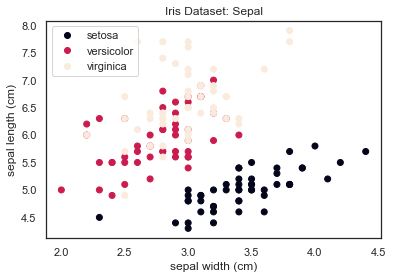

In [35]:
fig4 = plt.figure(facecolor='white')
ax = fig4.add_subplot(111)

plt.title("Iris Dataset: Sepal")
plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp = plt.scatter(x_s_data, y_s_data, c=iris.target)

classes = iris.target_names

plt.legend(handles=scp.legend_elements()[0], labels=[i for i in iris.target_names])

plt.savefig("Iris Predictions 12_16_2022\\iris_sepal.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


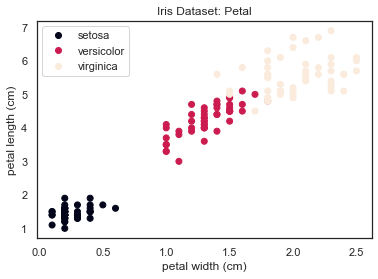

In [36]:
fig5 = plt.figure(facecolor='white')
ax = fig5.add_subplot(111)

ax.legend()

scp = plt.scatter(x_p_data, y_p_data, c=iris.target)

plt.title("Iris Dataset: Petal")
plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

classes = iris.target_names

plt.legend(handles=scp.legend_elements()[0], labels=[i for i in iris.target_names])

plt.savefig("Iris Predictions 12_16_2022\\iris_petal.png")

# Interpolation Example

In [27]:
x_data = np.linspace(0, 5, 5)
y_data = x_data**2

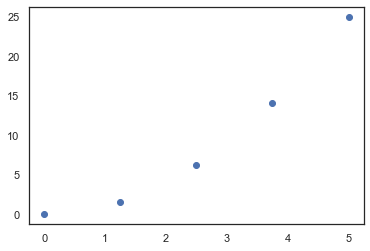

In [28]:
plt.scatter(x_data, y_data)

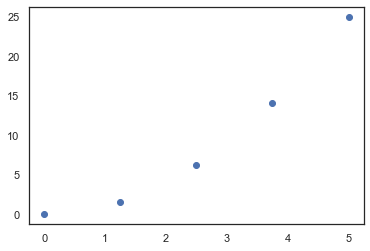

In [29]:
fig1 = plt.figure(facecolor='white')
ax = fig1.add_subplot(111)

scp = plt.scatter(x_data, y_data)

plt.show()

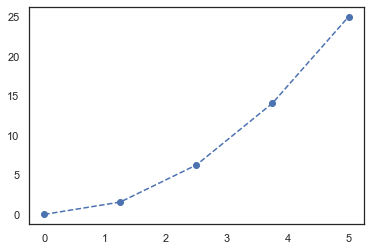

In [30]:
fig2 = plt.figure(facecolor='white')
ax = fig2.add_subplot(111)

scp = plt.plot(x_data, y_data, 'o--')

plt.show()

In [31]:
y_f = interp1d(x_data, y_data, 'linear')

x = np.linspace(0, 5, 100)
y = y_f(x)

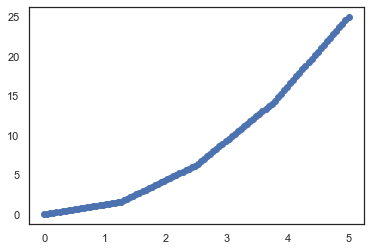

In [32]:
fig3 = plt.figure(facecolor='white')
ax = fig3.add_subplot(111)

scp = plt.scatter(x, y)

plt.show()

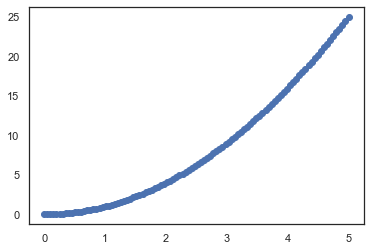

In [33]:
y_f = interp1d(x_data, y_data, 'cubic')

x = np.linspace(0, 5, 100)
y = y_f(x)

fig4 = plt.figure(facecolor='white')
ax = fig4.add_subplot(111)

scp = plt.scatter(x, y)

plt.show()

### See for examples:
#### https://www.youtube.com/watch?v=nGwg5MrbZxo
#### https://github.com/lukepolson/youtube_channel/blob/main/Python%20Tutorial%20Series/interpolation1.ipynb

# Making Predictions using Iris Dataset

In [41]:
iris = load_iris()

df = pd.DataFrame(iris.data)

df.columns = iris.feature_names

In [42]:
# store feature matrix in "x"
X = iris.data

In [43]:
# store feature vector in "y"
y = iris.target

In [44]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [45]:
# Use One-Hot-Encoding, Needed for Neural Network
Y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Create Models for Neural Network

#### model_0 
#### Accuracy < 30%

In [46]:
for step in tf.range(100):
    model_0 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])

    model_0.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    model_0.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0)
    loss, accuracy = model_0.evaluate(X_test, y_test, verbose=0)
    print(accuracy)
    
    
    if accuracy < 0.3:
        break
        

0.6666666865348816
0.5666666626930237
0.8999999761581421
0.5666666626930237
0.7666666507720947
0.9666666388511658
1.0
0.20000000298023224


#### model_1 
#### Accuracy  40 - 70 %

In [47]:
for step in tf.range(100):
    model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])

    model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    model_1.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0)
    loss, accuracy = model_1.evaluate(X_test, y_test, verbose=0)
    print(accuracy)
    
    
    if accuracy > 0.4 and accuracy < 0.7:
        break
        

0.6666666865348816


#### model_2 
#### Accuracy > 70%

In [67]:
for step in tf.range(100):
    model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])

    model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    model_2.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0)
    loss, accuracy = model_2.evaluate(X_test, y_test, verbose=0)
    print(accuracy)
    
    
    if accuracy > 0.7:
        break
        

0.5666666626930237
0.8666666746139526


#### Test Predictions using model_0:

In [48]:
y_pred = model_0.predict(X_test)

actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

targets = []
X_new = []

for index, row in df.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred_0 = model_0.predict(X_new)

df_0 = pd.DataFrame(y_pred_0)
df_0.columns = iris.target_names

targets = np.argmax(y_pred_0,axis=1)

targets_names = []
targets_count = []
targets_actual = []

for count, i in zip(range(len(targets)), targets):
    if i == 0:
        targets_names.append(iris.target_names[0])
        targets_count.append(y_pred_0[count][0])
    elif i == 1:
        targets_names.append(iris.target_names[1])
        targets_count.append(y_pred_0[count][1])
    elif i == 2:
        targets_names.append(iris.target_names[2])
        targets_count.append(y_pred_0[count][2])

for count, i in zip(range(len(iris.target)), iris.target):
    if i == 0:
        targets_actual.append(iris.target_names[0])
    elif i == 1:
        targets_actual.append(iris.target_names[1])
    elif i == 2:
        targets_actual.append(iris.target_names[2])
        
df_0['Prediction'] = targets_names
df_0['Actual'] = targets_actual

df_0['Counts'] = targets_count
        

Actual: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Predicted: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [49]:
df_0

,setosa,versicolor,virginica,Prediction,Actual,Counts
0,0.330323,0.327254,0.342424,virginica,setosa,0.342424
1,0.330323,0.327254,0.342424,virginica,setosa,0.342424
2,0.330323,0.327254,0.342424,virginica,setosa,0.342424
3,0.330323,0.327254,0.342424,virginica,setosa,0.342424
4,0.330323,0.327254,0.342424,virginica,setosa,0.342424
5,0.330323,0.327254,0.342424,virginica,setosa,0.342424
6,0.330323,0.327254,0.342424,virginica,setosa,0.342424
7,0.330323,0.327254,0.342424,virginica,setosa,0.342424
8,0.330323,0.327254,0.342424,virginica,setosa,0.342424
9,0.330323,0.327254,0.342424,virginica,setosa,0.342424


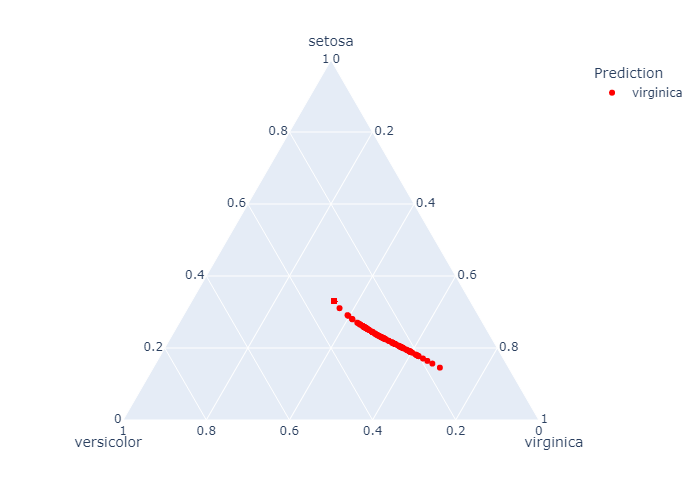

In [61]:
fig_m0p = px.scatter_ternary(df_0, a="setosa", b="versicolor", c="virginica", color="Prediction",
                        color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"})

fig_m0a = px.scatter_ternary(df_0, a="setosa", b="versicolor", c="virginica", color="Actual",
                        color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"})


fig_m0p.write_image("Iris Predictions 12_16_2022\\fig_m0p.png")
fig_m0a.write_image("Iris Predictions 12_16_2022\\fig_m0a.png")

fig_m0p_r = Image.open("Iris Predictions 12_16_2022\\fig_m0p.png")
fig_m0a_r = Image.open("Iris Predictions 12_16_2022\\fig_m0a.png")

fig_m0p_r

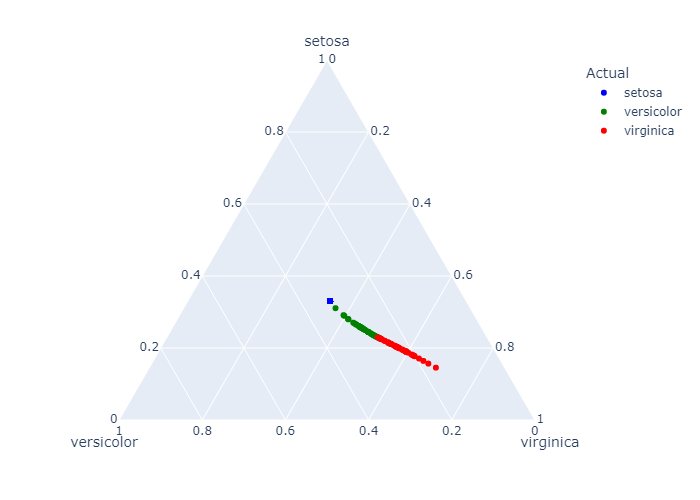

In [62]:
fig_m0a_r

#### Test Predictions using model_1

In [58]:
y_pred = model_1.predict(X_test)

actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

targets = []
X_new = []

for index, row in df.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred_1 = model_1.predict(X_new)

df_1 = pd.DataFrame(y_pred_1)
df_1.columns = iris.target_names

targets = np.argmax(y_pred_1,axis=1)

targets_names = []
targets_count = []
targets_actual = []

for count, i in zip(range(len(targets)), targets):
    if i == 0:
        targets_names.append(iris.target_names[0])
        targets_count.append(y_pred_1[count][0])
    elif i == 1:
        targets_names.append(iris.target_names[1])
        targets_count.append(y_pred_1[count][1])
    elif i == 2:
        targets_names.append(iris.target_names[2])
        targets_count.append(y_pred_1[count][2])

for count, i in zip(range(len(iris.target)), iris.target):
    if i == 0:
        targets_actual.append(iris.target_names[0])
    elif i == 1:
        targets_actual.append(iris.target_names[1])
    elif i == 2:
        targets_actual.append(iris.target_names[2])
        
df_1['Prediction'] = targets_names
df_1['Actual'] = targets_actual

df_1['Counts'] = targets_count
        

Actual: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Predicted: [2 2 0 2 0 2 0 2 2 2 2 1 2 2 2 0 2 2 0 0 2 1 0 0 2 0 0 2 1 0]


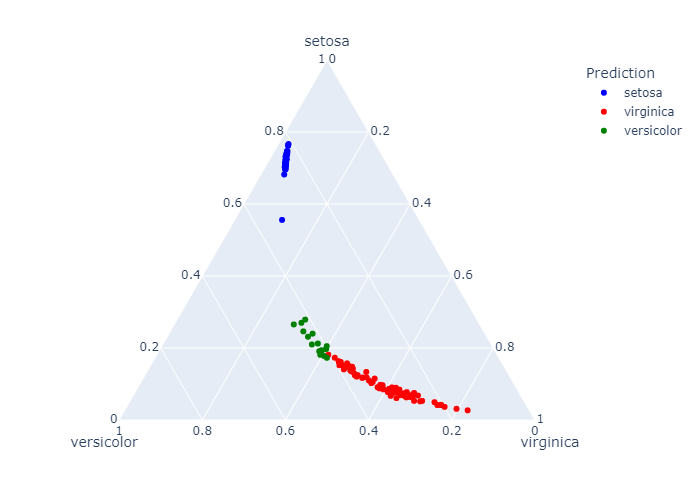

In [63]:
fig_m1p = px.scatter_ternary(df_1, a="setosa", b="versicolor", c="virginica", color="Prediction",
                        color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"})

fig_m1a = px.scatter_ternary(df_1, a="setosa", b="versicolor", c="virginica", color="Actual",
                        color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"})


fig_m1p.write_image("Iris Predictions 12_16_2022\\fig_m1p.png")
fig_m1a.write_image("Iris Predictions 12_16_2022\\fig_m1a.png")

fig_m1p_r = Image.open("Iris Predictions 12_16_2022\\fig_m1p.png")
fig_m1a_r = Image.open("Iris Predictions 12_16_2022\\fig_m1a.png")

fig_m1p_r

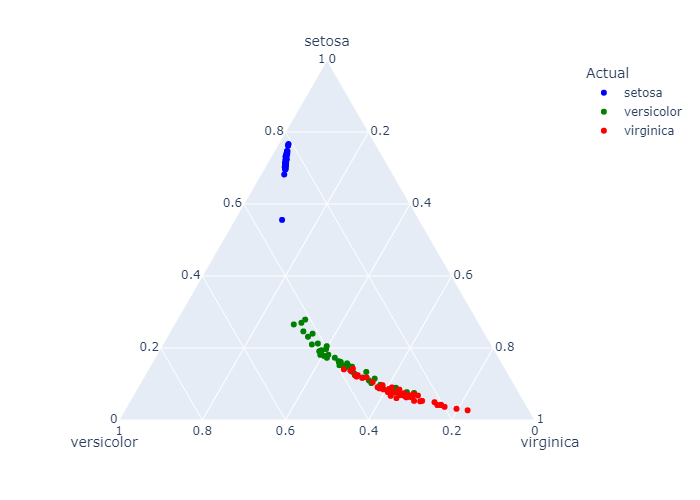

In [64]:
fig_m1a_r

In [68]:
y_pred = model_2.predict(X_test)

actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

targets = []
X_new = []

for index, row in df.iterrows():
    X_new.append([row['sepal length (cm)'], row['sepal width (cm)'],
         row['petal length (cm)'], row['petal width (cm)']])
    
y_pred_2 = model_2.predict(X_new)

df_2 = pd.DataFrame(y_pred_2)
df_2.columns = iris.target_names

targets = np.argmax(y_pred_2,axis=1)

targets_names = []
targets_count = []
targets_actual = []

for count, i in zip(range(len(targets)), targets):
    if i == 0:
        targets_names.append(iris.target_names[0])
        targets_count.append(y_pred_2[count][0])
    elif i == 1:
        targets_names.append(iris.target_names[1])
        targets_count.append(y_pred_2[count][1])
    elif i == 2:
        targets_names.append(iris.target_names[2])
        targets_count.append(y_pred_2[count][2])

for count, i in zip(range(len(iris.target)), iris.target):
    if i == 0:
        targets_actual.append(iris.target_names[0])
    elif i == 1:
        targets_actual.append(iris.target_names[1])
    elif i == 2:
        targets_actual.append(iris.target_names[2])
        
df_2['Prediction'] = targets_names
df_2['Actual'] = targets_actual

df_2['Counts'] = targets_count
        

Actual: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Predicted: [2 1 0 2 0 2 0 1 1 1 2 1 2 1 2 0 1 2 0 0 2 2 0 0 2 0 0 1 1 0]


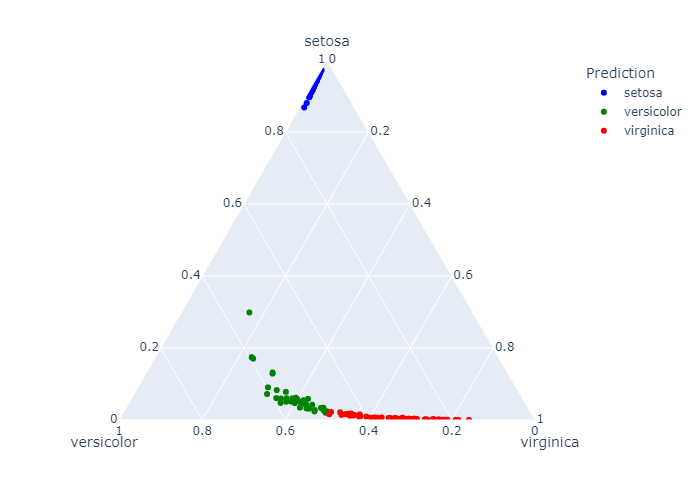

In [69]:
fig_m2p = px.scatter_ternary(df_2, a="setosa", b="versicolor", c="virginica", color="Prediction",
                        color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"})

fig_m2a = px.scatter_ternary(df_2, a="setosa", b="versicolor", c="virginica", color="Actual",
                        color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"})


fig_m2p.write_image("Iris Predictions 12_16_2022\\fig_m2p.png")
fig_m2a.write_image("Iris Predictions 12_16_2022\\fig_m2a.png")

fig_m2p_r = Image.open("Iris Predictions 12_16_2022\\fig_m2p.png")
fig_m2a_r = Image.open("Iris Predictions 12_16_2022\\fig_m2a.png")

fig_m2p_r

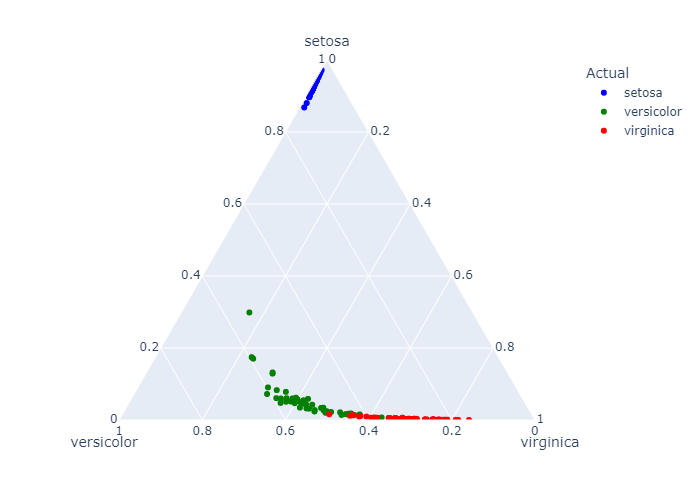

In [71]:
fig_m2a_r

In [59]:
df_iris = df.copy()
df_iris['Target'] = iris.target

df_iris_new_A = df_iris.groupby(['Target']).sample(1)
df_iris_new_B = df_iris.groupby(['Target']).sample(1)
df_iris_new_C = df_iris.groupby(['Target']).sample(1)
df_iris_new_D = df_iris.groupby(['Target']).sample(1)
df_iris_new_E = df_iris.groupby(['Target']).sample(1)

In [60]:
df_iris_new_A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
40,5.0,3.5,1.3,0.3,0
88,5.6,3.0,4.1,1.3,1
115,6.4,3.2,5.3,2.3,2


# GROUP A

In [ ]:
df_iris_new_A[df_iris_new_A.columns[0]].iloc[0]

In [ ]:
iris.feature_names

In [ ]:
list(df_iris_new_A.columns[:-1])

In [ ]:
def interpolate_points(dataframe, model):
    
    # 1 / 2 > 3
    sl1 = dataframe[dataframe.columns[0]].iloc[0]
    sl2 = dataframe[dataframe.columns[0]].iloc[1]
    sl3 = dataframe[dataframe.columns[0]].iloc[2]

    sw1 = dataframe[dataframe.columns[1]].iloc[0]
    sw2 = dataframe[dataframe.columns[1]].iloc[1]
    sw3 = dataframe[dataframe.columns[1]].iloc[2]

    pl1 = dataframe[dataframe.columns[2]].iloc[0]
    pl2 = dataframe[dataframe.columns[2]].iloc[1]
    pl3 = dataframe[dataframe.columns[2]].iloc[2]

    pw1 = dataframe[dataframe.columns[3]].iloc[0]
    pw2 = dataframe[dataframe.columns[3]].iloc[1]
    pw3 = dataframe[dataframe.columns[3]].iloc[2]
    
    sl12 = np.linspace(sl1, sl2, 11)
    sl13 = np.linspace(sl1, sl3, 11)
    sl23 = np.linspace(sl2, sl3, 11)

    sw12 = np.linspace(sw1, sw2, 11)
    sw13 = np.linspace(sw1, sw3, 11)
    sw23 = np.linspace(sw2, sw3, 11)

    pl12 = np.linspace(pl1, pl2, 11)
    pl13 = np.linspace(pl1, pl3, 11)
    pl23 = np.linspace(pl2, pl3, 11)

    pw12 = np.linspace(pw1, pw2, 11)
    pw13 = np.linspace(pw1, pw3, 11)
    pw23 = np.linspace(pw2, pw3, 11)

    df_iris_12 = pd.DataFrame(list(zip(sl12, sw12, pl12, pw12)), columns = list(dataframe.columns[:-1]))
    df_iris_13 = pd.DataFrame(list(zip(sl13, sw13, pl13, pw13)), columns = list(dataframe.columns[:-1]))
    df_iris_23 = pd.DataFrame(list(zip(sl23, sw23, pl23, pw23)), columns = list(dataframe.columns[:-1]))
    
    sl_100_0 = df_iris_12[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_12[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_12[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_12[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_12[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_12[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_12[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_12[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_12[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_12[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_12[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_12[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_12[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_12[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_12[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_12[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_12[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_12[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_12[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_12[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_12[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_12[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_12[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_12[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_12[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_12[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_12[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_12[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_12[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_12[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_12[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_12[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_12[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_12[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_12[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_12[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_12[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_12[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_12[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_12[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_12[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_12[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_12[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_12[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl3, 11)
    sl_90_10 = np.linspace(sl_90_10, sl3, 11)
    sl_80_20 = np.linspace(sl_80_20, sl3, 11)
    sl_70_30 = np.linspace(sl_70_30, sl3, 11)
    sl_60_40 = np.linspace(sl_60_40, sl3, 11)
    sl_50_50 = np.linspace(sl_50_50, sl3, 11)
    sl_40_60 = np.linspace(sl_40_60, sl3, 11)
    sl_30_70 = np.linspace(sl_30_70, sl3, 11)
    sl_20_80 = np.linspace(sl_20_80, sl3, 11)
    sl_10_90 = np.linspace(sl_10_90, sl3, 11)
    sl_0_100 = np.linspace(sl_0_100, sl3, 11)

    sw_100_0 = np.linspace(sw_100_0, sw3, 11)
    sw_90_10 = np.linspace(sw_90_10, sw3, 11)
    sw_80_20 = np.linspace(sw_80_20, sw3, 11)
    sw_70_30 = np.linspace(sw_70_30, sw3, 11)
    sw_60_40 = np.linspace(sw_60_40, sw3, 11)
    sw_50_50 = np.linspace(sw_50_50, sw3, 11)
    sw_40_60 = np.linspace(sw_40_60, sw3, 11)
    sw_30_70 = np.linspace(sw_30_70, sw3, 11)
    sw_20_80 = np.linspace(sw_20_80, sw3, 11)
    sw_10_90 = np.linspace(sw_10_90, sw3, 11)
    sw_0_100 = np.linspace(sw_0_100, sw3, 11)

    pl_100_0 = np.linspace(pl_100_0, pl3, 11)
    pl_90_10 = np.linspace(pl_90_10, pl3, 11)
    pl_80_20 = np.linspace(pl_80_20, pl3, 11)
    pl_70_30 = np.linspace(pl_70_30, pl3, 11)
    pl_60_40 = np.linspace(pl_60_40, pl3, 11)
    pl_50_50 = np.linspace(pl_50_50, pl3, 11)
    pl_40_60 = np.linspace(pl_40_60, pl3, 11)
    pl_30_70 = np.linspace(pl_30_70, pl3, 11)
    pl_20_80 = np.linspace(pl_20_80, pl3, 11)
    pl_10_90 = np.linspace(pl_10_90, pl3, 11)
    pl_0_100 = np.linspace(pl_0_100, pl3, 11)

    pw_100_0 = np.linspace(pw_100_0, pw3, 11)
    pw_90_10 = np.linspace(pw_90_10, pw3, 11)
    pw_80_20 = np.linspace(pw_80_20, pw3, 11)
    pw_70_30 = np.linspace(pw_70_30, pw3, 11)
    pw_60_40 = np.linspace(pw_60_40, pw3, 11)
    pw_50_50 = np.linspace(pw_50_50, pw3, 11)
    pw_40_60 = np.linspace(pw_40_60, pw3, 11)
    pw_30_70 = np.linspace(pw_30_70, pw3, 11)
    pw_20_80 = np.linspace(pw_20_80, pw3, 11)
    pw_10_90 = np.linspace(pw_10_90, pw3, 11)
    pw_0_100 = np.linspace(pw_0_100, pw3, 11)

    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_12_3 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    # 1 / 3 > 2
    sl_100_0 = df_iris_13[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_13[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_13[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_13[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_13[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_13[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_13[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_13[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_13[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_13[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_13[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_13[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_13[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_13[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_13[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_13[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_13[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_13[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_13[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_13[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_13[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_13[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_13[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_13[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_13[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_13[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_13[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_13[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_13[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_13[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_13[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_13[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_13[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_13[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_13[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_13[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_13[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_13[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_13[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_13[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_13[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_13[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_13[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_13[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl2, 11)
    sl_90_10 = np.linspace(sl_90_10, sl2, 11)
    sl_80_20 = np.linspace(sl_80_20, sl2, 11)
    sl_70_30 = np.linspace(sl_70_30, sl2, 11)
    sl_60_40 = np.linspace(sl_60_40, sl2, 11)
    sl_50_50 = np.linspace(sl_50_50, sl2, 11)
    sl_40_60 = np.linspace(sl_40_60, sl2, 11)
    sl_30_70 = np.linspace(sl_30_70, sl2, 11)
    sl_20_80 = np.linspace(sl_20_80, sl2, 11)
    sl_10_90 = np.linspace(sl_10_90, sl2, 11)
    sl_0_100 = np.linspace(sl_0_100, sl2, 11)

    sw_100_0 = np.linspace(sw_100_0, sw2, 11)
    sw_90_10 = np.linspace(sw_90_10, sw2, 11)
    sw_80_20 = np.linspace(sw_80_20, sw2, 11)
    sw_70_30 = np.linspace(sw_70_30, sw2, 11)
    sw_60_40 = np.linspace(sw_60_40, sw2, 11)
    sw_50_50 = np.linspace(sw_50_50, sw2, 11)
    sw_40_60 = np.linspace(sw_40_60, sw2, 11)
    sw_30_70 = np.linspace(sw_30_70, sw2, 11)
    sw_20_80 = np.linspace(sw_20_80, sw2, 11)
    sw_10_90 = np.linspace(sw_10_90, sw2, 11)
    sw_0_100 = np.linspace(sw_0_100, sw2, 11)

    pl_100_0 = np.linspace(pl_100_0, pl2, 11)
    pl_90_10 = np.linspace(pl_90_10, pl2, 11)
    pl_80_20 = np.linspace(pl_80_20, pl2, 11)
    pl_70_30 = np.linspace(pl_70_30, pl2, 11)
    pl_60_40 = np.linspace(pl_60_40, pl2, 11)
    pl_50_50 = np.linspace(pl_50_50, pl2, 11)
    pl_40_60 = np.linspace(pl_40_60, pl2, 11)
    pl_30_70 = np.linspace(pl_30_70, pl2, 11)
    pl_20_80 = np.linspace(pl_20_80, pl2, 11)
    pl_10_90 = np.linspace(pl_10_90, pl2, 11)
    pl_0_100 = np.linspace(pl_0_100, pl2, 11)

    pw_100_0 = np.linspace(pw_100_0, pw2, 11)
    pw_90_10 = np.linspace(pw_90_10, pw2, 11)
    pw_80_20 = np.linspace(pw_80_20, pw2, 11)
    pw_70_30 = np.linspace(pw_70_30, pw2, 11)
    pw_60_40 = np.linspace(pw_60_40, pw2, 11)
    pw_50_50 = np.linspace(pw_50_50, pw2, 11)
    pw_40_60 = np.linspace(pw_40_60, pw2, 11)
    pw_30_70 = np.linspace(pw_30_70, pw2, 11)
    pw_20_80 = np.linspace(pw_20_80, pw2, 11)
    pw_10_90 = np.linspace(pw_10_90, pw2, 11)
    pw_0_100 = np.linspace(pw_0_100, pw2, 11)

    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_13_2 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    # 2 / 3 > 1
    sl_100_0 = df_iris_23[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_23[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_23[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_23[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_23[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_23[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_23[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_23[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_23[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_23[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_23[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_23[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_23[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_23[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_23[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_23[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_23[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_23[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_23[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_23[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_23[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_23[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_23[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_23[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_23[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_23[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_23[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_23[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_23[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_23[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_23[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_23[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_23[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_23[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_23[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_23[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_23[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_23[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_23[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_23[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_23[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_23[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_23[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_23[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl1, 11)
    sl_90_10 = np.linspace(sl_90_10, sl1, 11)
    sl_80_20 = np.linspace(sl_80_20, sl1, 11)
    sl_70_30 = np.linspace(sl_70_30, sl1, 11)
    sl_60_40 = np.linspace(sl_60_40, sl1, 11)
    sl_50_50 = np.linspace(sl_50_50, sl1, 11)
    sl_40_60 = np.linspace(sl_40_60, sl1, 11)
    sl_30_70 = np.linspace(sl_30_70, sl1, 11)
    sl_20_80 = np.linspace(sl_20_80, sl1, 11)
    sl_10_90 = np.linspace(sl_10_90, sl1, 11)
    sl_0_100 = np.linspace(sl_0_100, sl1, 11)

    sw_100_0 = np.linspace(sw_100_0, sw1, 11)
    sw_90_10 = np.linspace(sw_90_10, sw1, 11)
    sw_80_20 = np.linspace(sw_80_20, sw1, 11)
    sw_70_30 = np.linspace(sw_70_30, sw1, 11)
    sw_60_40 = np.linspace(sw_60_40, sw1, 11)
    sw_50_50 = np.linspace(sw_50_50, sw1, 11)
    sw_40_60 = np.linspace(sw_40_60, sw1, 11)
    sw_30_70 = np.linspace(sw_30_70, sw1, 11)
    sw_20_80 = np.linspace(sw_20_80, sw1, 11)
    sw_10_90 = np.linspace(sw_10_90, sw1, 11)
    sw_0_100 = np.linspace(sw_0_100, sw1, 11)

    pl_100_0 = np.linspace(pl_100_0, pl1, 11)
    pl_90_10 = np.linspace(pl_90_10, pl1, 11)
    pl_80_20 = np.linspace(pl_80_20, pl1, 11)
    pl_70_30 = np.linspace(pl_70_30, pl1, 11)
    pl_60_40 = np.linspace(pl_60_40, pl1, 11)
    pl_50_50 = np.linspace(pl_50_50, pl1, 11)
    pl_40_60 = np.linspace(pl_40_60, pl1, 11)
    pl_30_70 = np.linspace(pl_30_70, pl1, 11)
    pl_20_80 = np.linspace(pl_20_80, pl1, 11)
    pl_10_90 = np.linspace(pl_10_90, pl1, 11)
    pl_0_100 = np.linspace(pl_0_100, pl1, 11)

    pw_100_0 = np.linspace(pw_100_0, pw1, 11)
    pw_90_10 = np.linspace(pw_90_10, pw1, 11)
    pw_80_20 = np.linspace(pw_80_20, pw1, 11)
    pw_70_30 = np.linspace(pw_70_30, pw1, 11)
    pw_60_40 = np.linspace(pw_60_40, pw1, 11)
    pw_50_50 = np.linspace(pw_50_50, pw1, 11)
    pw_40_60 = np.linspace(pw_40_60, pw1, 11)
    pw_30_70 = np.linspace(pw_30_70, pw1, 11)
    pw_20_80 = np.linspace(pw_20_80, pw1, 11)
    pw_10_90 = np.linspace(pw_10_90, pw1, 11)
    pw_0_100 = np.linspace(pw_0_100, pw1, 11)
    
    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_23_1 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    df_iris_123 = df_iris_12_3.append([ 
                              df_iris_13_2,
                              df_iris_23_1
                                ])
    
    df_pred = pd.DataFrame()
    
    targets = []

    X_new = []

    for index, row in df_iris_123.iterrows():
        X_new.append([row[dataframe.columns[0]], row[dataframe.columns[1]],
             row[dataframe.columns[2]], row[dataframe.columns[3]]])

    y_pred = model.predict(X_new)

    targets = np.argmax(y_pred,axis=1)

    target_names = []
    target_counts = []

    for count, i in zip(range(len(targets)), targets):
        if i == 0:
            target_names.append(iris.target_names[0])
            target_counts.append(y_pred[count][0])
        elif i == 1:
            target_names.append(iris.target_names[1])
            target_counts.append(y_pred[count][1])
        elif i == 2:
            target_names.append(iris.target_names[2])
            target_counts.append(y_pred[count][2])

    setosa = []
    versicolor = []
    virginica = []

    for i in y_pred:
        setosa.append(i[0])
        versicolor.append(i[1])
        virginica.append(i[2])

    df_pred['Setosa'] = setosa
    df_pred['Versicolor'] = versicolor
    df_pred['Virginica'] = virginica

    df_pred['Prediction'] = target_names
    df_pred['Counts'] = target_counts

    df_iris_123['Predictions'] = targets
    
    return df_iris_123, df_pred

In [ ]:
df_iris_A_123, df_A_pred = interpolate_points(df_iris_new_A, model_2)

In [ ]:
df_iris_A_123

In [ ]:
df_A_pred

# Graph 1/2 > 3, 1/3 > 2, 2/3 > 1         

In [ ]:
classes = iris.target_names

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group A)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_A['petal width (cm)'], 
            df_iris_new_A['petal length (cm)'],
            c = df_iris_new_A['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_A_123['petal width (cm)'], 
            df_iris_A_123['petal length (cm)'],
            c = df_iris_A_123['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\iris_petals_group_a.png", bbox_inches='tight')

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group A)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_A['sepal width (cm)'], 
            df_iris_new_A['sepal length (cm)'],
            c = df_iris_new_A['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_A_123['sepal width (cm)'], 
            df_iris_A_123['sepal length (cm)'],
            c = df_iris_A_123['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\iris_sepals_group_a.png", bbox_inches='tight')

plt.show()



In [ ]:
fig_A = px.line(df_A_pred.iloc[:, 0:3], title="Iris Dataset Predictions (Group A): ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_A.update_layout(autosize=False, width=900, height=400)

fig_A.write_image("Iris Predictions 12_16_2022\\fig_A.png")

fig_A_r = Image.open("Iris Predictions 12_16_2022\\fig_A.png")

fig_A_r

# Group B:

In [ ]:
df_iris_B_123, df_B_pred = interpolate_points(df_iris_new_B, model_2)

# Graph 1/2 > 3, 1/3 > 2, 2/3 > 1         

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group B)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_B['petal width (cm)'], 
            df_iris_new_B['petal length (cm)'],
            c = df_iris_new_B['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_B_123['petal width (cm)'], 
            df_iris_B_123['petal length (cm)'],
            c = df_iris_B_123['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\iris_petals_group_b.png", bbox_inches='tight')

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group B)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_B['sepal width (cm)'], 
            df_iris_new_B['sepal length (cm)'],
            c = df_iris_new_B['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_B_123['sepal width (cm)'], 
            df_iris_B_123['sepal length (cm)'],
            c = df_iris_B_123['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\iris_sepals_group_b.png", bbox_inches='tight')
plt.show()



In [ ]:
df_B_pred

In [ ]:
fig_B = px.line(df_B_pred.iloc[:, 0:3], title="Iris Dataset Predictions (Group B): ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_B.update_layout(autosize=False, width=900, height=400)

fig_B.write_image("Iris Predictions 12_16_2022\\fig_B.png")

fig_B_r = Image.open("Iris Predictions 12_16_2022\\fig_B.png")

fig_B_r

# Group C:

In [ ]:
df_iris_C_123, df_C_pred = interpolate_points(df_iris_new_C, model_2)

# Graph 1/2 > 3, 1/3 > 2, 2/3 > 1         

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group C)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_C['petal width (cm)'], 
            df_iris_new_C['petal length (cm)'],
            c = df_iris_new_C['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_C_123['petal width (cm)'], 
            df_iris_C_123['petal length (cm)'],
            c = df_iris_C_123['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_petals_group_c.png", bbox_inches='tight')

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group C)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_C['sepal width (cm)'], 
            df_iris_new_C['sepal length (cm)'],
            c = df_iris_new_C['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_C_123['sepal width (cm)'], 
            df_iris_C_123['sepal length (cm)'],
            c = df_iris_C_123['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_sepals_group_c.png", bbox_inches='tight')

plt.show()



In [ ]:
fig_C = px.line(df_C_pred.iloc[:, 0:3], title="Iris Dataset Predictions (Group C): ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_C.update_layout(autosize=False, width=900, height=400)

fig_C.write_image("Iris Predictions 12_16_2022\\fig_C.png")

fig_C_r = Image.open("Iris Predictions 12_16_2022\\fig_C.png")

fig_C_r

# Group D:

In [ ]:
df_iris_D_123, df_D_pred = interpolate_points(df_iris_new_D, model_2)

# Graph 1/2 > 3, 1/3 > 2, 2/3 > 1         

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group D)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_D['petal width (cm)'], 
            df_iris_new_D['petal length (cm)'],
            c = df_iris_new_D['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_D_123['petal width (cm)'], 
            df_iris_D_123['petal length (cm)'],
            c = df_iris_D_123['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\iris_petals_group_d.png", bbox_inches='tight')

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group D)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_D['sepal width (cm)'], 
            df_iris_new_D['sepal length (cm)'],
            c = df_iris_new_D['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_D_123['sepal width (cm)'], 
            df_iris_D_123['sepal length (cm)'],
            c = df_iris_D_123['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\iris_sepals_group_d.png", bbox_inches='tight')

plt.show()



In [ ]:
fig_D = px.line(df_D_pred.iloc[:, 0:3], title="Iris Dataset Predictions (Group D): ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_D.update_layout(autosize=False, width=900, height=400)

fig_D.write_image("Iris Predictions 12_16_2022\\fig_D.png")

fig_D_r = Image.open("Iris Predictions 12_16_2022\\fig_D.png")

fig_D_r

# Group E:

In [ ]:
df_iris_E_123, df_E_pred = interpolate_points(df_iris_new_E, model_2)

# Graph 1/2 > 3, 1/3 > 2, 2/3 > 1         

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("petal width (cm)")
plt.ylabel("petal length (cm)")

plt.suptitle('Iris Dataset: Petals (Group E)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_iris_new_E['petal width (cm)'], 
            df_iris_new_E['petal length (cm)'],
            c = df_iris_new_E['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_E_123['petal width (cm)'], 
            df_iris_E_123['petal length (cm)'],
            c = df_iris_E_123['Predictions'])

plt.xlabel("petal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\iris_petals_group_e.png", bbox_inches='tight')

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Iris Dataset: Sepals (Group E)', fontsize=16, y=1.05)

plt.xlabel("sepal width (cm)")
plt.ylabel("sepal length (cm)")

scp1 = plt.scatter(df_iris_new_E['sepal width (cm)'], 
            df_iris_new_E['sepal length (cm)'],
            c = df_iris_new_E['Target'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_iris_E_123['sepal width (cm)'], 
            df_iris_E_123['sepal length (cm)'],
            c = df_iris_E_123['Predictions'])

plt.xlabel("sepal width (cm)")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\iris_sepals_group_e.png", bbox_inches='tight')

plt.show()



In [ ]:
fig_E = px.line(df_E_pred.iloc[:, 0:3], title="Iris Dataset Predictions (Group E): ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_E.update_layout(autosize=False, width=900, height=400)

fig_E.write_image("Iris Predictions 12_16_2022\\fig_E.png")

fig_E_r = Image.open("Iris Predictions 12_16_2022\\fig_E.png")

fig_E_r

In [ ]:
# fig_A = px.scatter_ternary(df_1, a="setosa", b="versicolor", c="virginica", 
# # hover_name="district",
#     color="Prediction", 
#     size="Counts", 
#     size_max=10,
#     color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"} )
# fig.show()

In [ ]:
fig_A_r

In [ ]:
fig_B_r

In [ ]:
fig_C_r

In [ ]:
fig_D_r

In [ ]:
fig_E_r

In [ ]:
fig_A_pred = px.scatter_ternary(df_A_pred, a="Setosa", b="Versicolor", c="Virginica", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"} )

fig_A_pred.write_image("Iris Predictions 12_16_2022\\fig_A_pred_ternary.png")

fig_A_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_A_pred_ternary.png")

fig_A_pred_r

In [ ]:
fig_B_pred = px.scatter_ternary(df_B_pred, a="Setosa", b="Versicolor", c="Virginica", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"} )

fig_B_pred.write_image("Iris Predictions 12_16_2022\\fig_B_pred_ternary.png")

fig_B_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_B_pred_ternary.png")

fig_B_pred_r

In [ ]:
fig_C_pred = px.scatter_ternary(df_C_pred, a="Setosa", b="Versicolor", c="Virginica", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"} )

fig_C_pred.write_image("Iris Predictions 12_16_2022\\fig_C_pred_ternary.png")

fig_C_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_C_pred_ternary.png")

fig_C_pred_r

In [ ]:
fig_D_pred = px.scatter_ternary(df_D_pred, a="Setosa", b="Versicolor", c="Virginica", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"} )

fig_D_pred.write_image("Iris Predictions 12_16_2022\\fig_D_pred_ternary.png")

fig_D_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_D_pred_ternary.png")

fig_D_pred_r

In [ ]:
fig_E_pred = px.scatter_ternary(df_E_pred, a="Setosa", b="Versicolor", c="Virginica", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"setosa": "blue", "versicolor": "green", "virginica":"red"} )

fig_E_pred.write_image("Iris Predictions 12_16_2022\\fig_E_pred_ternary.png")

fig_E_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_E_pred_ternary.png")

fig_E_pred_r

In [ ]:
df_2

In [ ]:
df['Target'] = iris.target
df['Species'] = df_0['Actual']

In [ ]:
df

In [ ]:
df_0

In [ ]:
# Paired plot using seaborn
# sns.set()
orig = sns.pairplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Target']],
             hue="Target", diag_kind="kde", palette="Set1")

orig.savefig("Iris Predictions 12_16_2022\\iris_pairplot.png")

In [ ]:
copy = df_iris_A_123.copy()

In [ ]:
df_iris_A_123

In [ ]:
df_iris_A_123.reset_index(drop=True, inplace=True)
df_iris_B_123.reset_index(drop=True, inplace=True)
df_iris_C_123.reset_index(drop=True, inplace=True)
df_iris_D_123.reset_index(drop=True, inplace=True)
df_iris_E_123.reset_index(drop=True, inplace=True)

In [ ]:
group_A = sns.pairplot(df_iris_A_123[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Predictions']],
             hue="Predictions", diag_kind="kde", palette="Set1")

In [ ]:
group_B = sns.pairplot(df_iris_B_123[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Predictions']],
             hue="Predictions", diag_kind="kde", palette="Set1")

In [ ]:
group_C = sns.pairplot(df_iris_C_123[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Predictions']],
             hue="Predictions", diag_kind="kde", palette="Set1")

In [ ]:
df_iris_D_123

In [ ]:
group_D = sns.pairplot(df_iris_D_123[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Predictions']],
             hue="Predictions", diag_kind="kde", palette="Set1")

In [ ]:
group_E = sns.pairplot(df_iris_E_123[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'Predictions']],
             hue="Predictions", diag_kind="kde", palette="Set1")

In [ ]:
df

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df.drop("Target", axis=1), "Species")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df_iris_A_123, "Predictions")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df_iris_B_123, "Predictions")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(15,10))
andrews_curves(df_iris_C_123, "Predictions")
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

## Hawks Dataset

In [103]:
# Read in hawks dataset instead of Iris
hawks = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Stat2Data/Hawks.csv')
# Remove a few cases with missing data
hawks = hawks[~hawks['Wing'].isnull()]

hawks.reset_index(drop=True, inplace=True)

hawks = hawks.drop("Unnamed: 0", axis=1)

In [104]:
hawks

,Month,Day,Year,CaptureTime,ReleaseTime,BandNumber,Species,Age,Sex,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
0,9,19,1992,13:30,NaN,877-76317,RT,I,NaN,385.0,920.0,25.70,30.10,219,NaN,NaN,NaN,NaN,NaN
1,9,22,1992,10:30,,877-76318,RT,I,NaN,376.0,930.0,NaN,NaN,221,NaN,NaN,NaN,NaN,NaN
2,9,23,1992,12:45,,877-76319,RT,I,NaN,381.0,990.0,26.70,31.30,235,NaN,NaN,NaN,NaN,NaN
3,9,23,1992,10:50,,745-49508,CH,I,F,265.0,470.0,18.70,23.50,220,NaN,NaN,NaN,NaN,NaN
4,9,27,1992,11:15,,1253-98801,SS,I,F,205.0,170.0,12.50,14.30,157,NaN,NaN,NaN,NaN,NaN
5,9,28,1992,11:25,,1207-55910,RT,I,NaN,412.0,1090.0,28.50,32.20,230,NaN,NaN,NaN,NaN,NaN
6,9,28,1992,13:30,,877-76320,RT,I,NaN,370.0,960.0,25.30,30.10,212,NaN,NaN,NaN,NaN,NaN
7,9,29,1992,11:45,,877-76321,RT,A,NaN,375.0,855.0,27.20,30.00,243,NaN,NaN,NaN,NaN,NaN
8,9,29,1992,15:35,,877-76322,RT,A,NaN,412.0,1210.0,29.30,31.30,210,NaN,NaN,NaN,NaN,NaN
9,9,30,1992,13:45,,1207-55911,RT,I,NaN,405.0,1120.0,26.00,30.20,238,NaN,NaN,NaN,NaN,NaN


In [105]:
hawks_data = hawks[["Wing", "Tail", "Weight", "Hallux", "Species"]].copy()

In [106]:
hawks_data = hawks_data[~hawks_data['Weight'].isnull()]

In [107]:
hawks_data.sort_values(by = 'Species', inplace = True)

In [108]:
hawks_data.reset_index(drop=True, inplace=True)

In [109]:
# Species:
# CH = Cooper's
# RT = Red-tailed
# SS = Sharp-Shinned

In [110]:
hawks_data['Species Type'] = hawks_data['Species'].map({'CH':1, 'RT':2, 'SS':3})

In [111]:
hawks_data

,Wing,Tail,Weight,Hallux,Species,Species Type
0,218.0,183,295.0,19.40,CH,1
1,230.0,188,330.0,19.40,CH,1
2,268.0,215,590.0,19.90,CH,1
3,240.0,192,340.0,19.30,CH,1
4,252.0,230,340.0,20.80,CH,1
5,237.0,195,365.0,19.90,CH,1
6,252.0,211,470.0,28.40,CH,1
7,233.0,187,335.0,21.30,CH,1
8,252.0,185,540.0,28.80,CH,1
9,260.0,216,565.0,24.20,CH,1


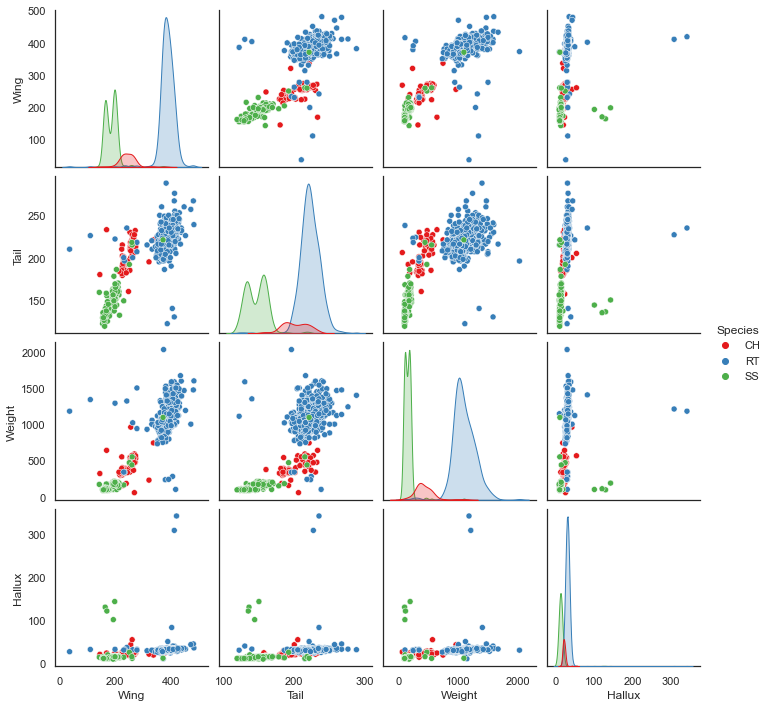

In [112]:
group_hawks = sns.pairplot(hawks_data[['Wing', 'Tail', 'Weight', 'Hallux', 'Species']],
             hue="Species", diag_kind="kde", palette="Set1")

In [113]:
occur = hawks_data.groupby(['Species']).size()
 
# display occurrences of a particular column
display(occur)
 

Species
CH     69
RT    572
SS    256
dtype: int64

In [74]:
hawks_df = hawks_data.groupby(['Species']).sample(50)

In [75]:
occur = hawks_df.groupby(['Species']).size()
 
# display occurrences of a particular column
display(occur)

Species
CH    50
RT    50
SS    50
dtype: int64

In [76]:
hawks_df.sort_values(by = 'Species', inplace = True)
hawks_df.reset_index(drop=True, inplace=True)

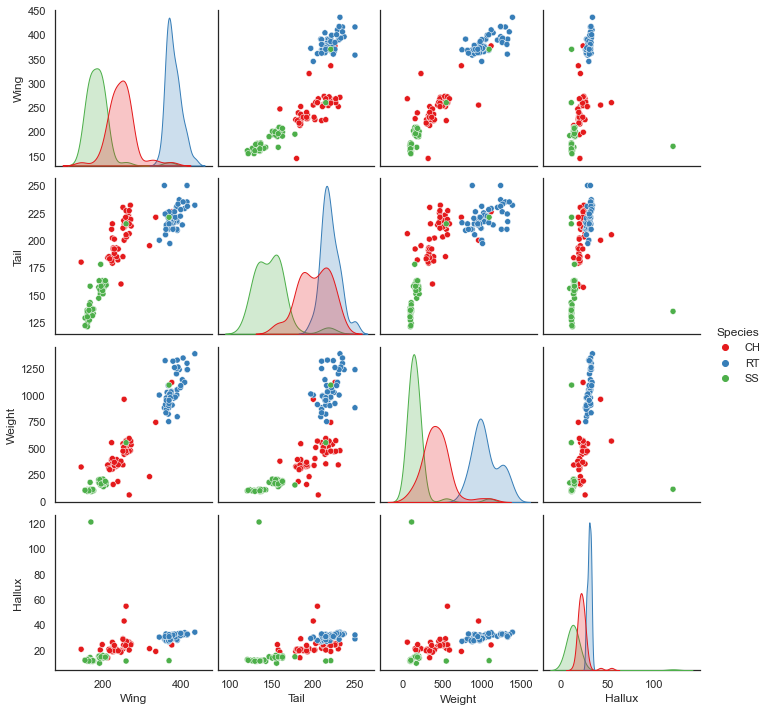

In [77]:
group_hawks = sns.pairplot(hawks_df[['Wing', 'Tail', 'Weight', 'Hallux', 'Species']],
             hue="Species", diag_kind="kde", palette="Set1")

In [78]:
hawks_df

,Wing,Tail,Weight,Hallux,Species,Species Type
0,255.0,200,960.0,42.80,CH,1
1,271.0,232,475.0,24.75,CH,1
2,235.0,193,327.0,20.30,CH,1
3,233.0,191,324.0,19.30,CH,1
4,227.0,193,330.0,18.50,CH,1
5,266.0,223,535.0,25.40,CH,1
6,223.0,210,550.0,21.30,CH,1
7,252.0,230,340.0,20.80,CH,1
8,265.0,225,464.0,24.10,CH,1
9,223.0,185,375.0,20.70,CH,1


In [79]:
hawk_targets = list((hawks_df['Species']).unique())

In [80]:
hawk_targets

['CH', 'RT', 'SS']

In [81]:
# store feature matrix in "x"
X = hawks_df[hawks_df.columns[:-2]].values

# store feature vector in "y"
y = hawks_df['Species Type'].values



from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

# Use One-Hot-Encoding, Needed for Neural Network
Y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

for step in tf.range(100):
    model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])

    model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    model_3.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0)
    loss, accuracy = model_3.evaluate(X_test, y_test, verbose=0)
    print(accuracy)
    
    
    if accuracy > 0.69:
        break
        

0.8666666746139526


In [82]:
# df_seeds = seeds_df.copy()
# df_seeds['Target'] = seeds_df['Seed Type']

df_hawks_new_A = hawks_df.groupby(['Species Type']).sample(1).drop(['Species'], axis=1)
df_hawks_new_B = hawks_df.groupby(['Species Type']).sample(1).drop(['Species'], axis=1)
df_hawks_new_C = hawks_df.groupby(['Species Type']).sample(1).drop(['Species'], axis=1)
df_hawks_new_D = hawks_df.groupby(['Species Type']).sample(1).drop(['Species'], axis=1)
df_hawks_new_E = hawks_df.groupby(['Species Type']).sample(1).drop(['Species'], axis=1)

In [83]:
def interpolate_points2(dataframe, model):
    
    # 1 / 2 > 3
    sl1 = dataframe[dataframe.columns[0]].iloc[0]
    sl2 = dataframe[dataframe.columns[0]].iloc[1]
    sl3 = dataframe[dataframe.columns[0]].iloc[2]

    sw1 = dataframe[dataframe.columns[1]].iloc[0]
    sw2 = dataframe[dataframe.columns[1]].iloc[1]
    sw3 = dataframe[dataframe.columns[1]].iloc[2]

    pl1 = dataframe[dataframe.columns[2]].iloc[0]
    pl2 = dataframe[dataframe.columns[2]].iloc[1]
    pl3 = dataframe[dataframe.columns[2]].iloc[2]

    pw1 = dataframe[dataframe.columns[3]].iloc[0]
    pw2 = dataframe[dataframe.columns[3]].iloc[1]
    pw3 = dataframe[dataframe.columns[3]].iloc[2]
    
    sl12 = np.linspace(sl1, sl2, 11)
    sl13 = np.linspace(sl1, sl3, 11)
    sl23 = np.linspace(sl2, sl3, 11)

    sw12 = np.linspace(sw1, sw2, 11)
    sw13 = np.linspace(sw1, sw3, 11)
    sw23 = np.linspace(sw2, sw3, 11)

    pl12 = np.linspace(pl1, pl2, 11)
    pl13 = np.linspace(pl1, pl3, 11)
    pl23 = np.linspace(pl2, pl3, 11)

    pw12 = np.linspace(pw1, pw2, 11)
    pw13 = np.linspace(pw1, pw3, 11)
    pw23 = np.linspace(pw2, pw3, 11)

    df_iris_12 = pd.DataFrame(list(zip(sl12, sw12, pl12, pw12)), columns = list(dataframe.columns[:-1]))
    df_iris_13 = pd.DataFrame(list(zip(sl13, sw13, pl13, pw13)), columns = list(dataframe.columns[:-1]))
    df_iris_23 = pd.DataFrame(list(zip(sl23, sw23, pl23, pw23)), columns = list(dataframe.columns[:-1]))
    
    sl_100_0 = df_iris_12[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_12[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_12[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_12[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_12[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_12[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_12[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_12[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_12[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_12[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_12[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_12[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_12[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_12[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_12[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_12[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_12[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_12[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_12[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_12[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_12[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_12[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_12[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_12[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_12[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_12[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_12[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_12[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_12[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_12[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_12[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_12[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_12[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_12[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_12[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_12[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_12[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_12[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_12[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_12[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_12[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_12[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_12[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_12[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl3, 11)
    sl_90_10 = np.linspace(sl_90_10, sl3, 11)
    sl_80_20 = np.linspace(sl_80_20, sl3, 11)
    sl_70_30 = np.linspace(sl_70_30, sl3, 11)
    sl_60_40 = np.linspace(sl_60_40, sl3, 11)
    sl_50_50 = np.linspace(sl_50_50, sl3, 11)
    sl_40_60 = np.linspace(sl_40_60, sl3, 11)
    sl_30_70 = np.linspace(sl_30_70, sl3, 11)
    sl_20_80 = np.linspace(sl_20_80, sl3, 11)
    sl_10_90 = np.linspace(sl_10_90, sl3, 11)
    sl_0_100 = np.linspace(sl_0_100, sl3, 11)

    sw_100_0 = np.linspace(sw_100_0, sw3, 11)
    sw_90_10 = np.linspace(sw_90_10, sw3, 11)
    sw_80_20 = np.linspace(sw_80_20, sw3, 11)
    sw_70_30 = np.linspace(sw_70_30, sw3, 11)
    sw_60_40 = np.linspace(sw_60_40, sw3, 11)
    sw_50_50 = np.linspace(sw_50_50, sw3, 11)
    sw_40_60 = np.linspace(sw_40_60, sw3, 11)
    sw_30_70 = np.linspace(sw_30_70, sw3, 11)
    sw_20_80 = np.linspace(sw_20_80, sw3, 11)
    sw_10_90 = np.linspace(sw_10_90, sw3, 11)
    sw_0_100 = np.linspace(sw_0_100, sw3, 11)

    pl_100_0 = np.linspace(pl_100_0, pl3, 11)
    pl_90_10 = np.linspace(pl_90_10, pl3, 11)
    pl_80_20 = np.linspace(pl_80_20, pl3, 11)
    pl_70_30 = np.linspace(pl_70_30, pl3, 11)
    pl_60_40 = np.linspace(pl_60_40, pl3, 11)
    pl_50_50 = np.linspace(pl_50_50, pl3, 11)
    pl_40_60 = np.linspace(pl_40_60, pl3, 11)
    pl_30_70 = np.linspace(pl_30_70, pl3, 11)
    pl_20_80 = np.linspace(pl_20_80, pl3, 11)
    pl_10_90 = np.linspace(pl_10_90, pl3, 11)
    pl_0_100 = np.linspace(pl_0_100, pl3, 11)

    pw_100_0 = np.linspace(pw_100_0, pw3, 11)
    pw_90_10 = np.linspace(pw_90_10, pw3, 11)
    pw_80_20 = np.linspace(pw_80_20, pw3, 11)
    pw_70_30 = np.linspace(pw_70_30, pw3, 11)
    pw_60_40 = np.linspace(pw_60_40, pw3, 11)
    pw_50_50 = np.linspace(pw_50_50, pw3, 11)
    pw_40_60 = np.linspace(pw_40_60, pw3, 11)
    pw_30_70 = np.linspace(pw_30_70, pw3, 11)
    pw_20_80 = np.linspace(pw_20_80, pw3, 11)
    pw_10_90 = np.linspace(pw_10_90, pw3, 11)
    pw_0_100 = np.linspace(pw_0_100, pw3, 11)

    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_12_3 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    # 1 / 3 > 2
    sl_100_0 = df_iris_13[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_13[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_13[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_13[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_13[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_13[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_13[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_13[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_13[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_13[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_13[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_13[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_13[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_13[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_13[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_13[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_13[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_13[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_13[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_13[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_13[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_13[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_13[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_13[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_13[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_13[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_13[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_13[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_13[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_13[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_13[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_13[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_13[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_13[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_13[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_13[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_13[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_13[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_13[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_13[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_13[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_13[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_13[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_13[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl2, 11)
    sl_90_10 = np.linspace(sl_90_10, sl2, 11)
    sl_80_20 = np.linspace(sl_80_20, sl2, 11)
    sl_70_30 = np.linspace(sl_70_30, sl2, 11)
    sl_60_40 = np.linspace(sl_60_40, sl2, 11)
    sl_50_50 = np.linspace(sl_50_50, sl2, 11)
    sl_40_60 = np.linspace(sl_40_60, sl2, 11)
    sl_30_70 = np.linspace(sl_30_70, sl2, 11)
    sl_20_80 = np.linspace(sl_20_80, sl2, 11)
    sl_10_90 = np.linspace(sl_10_90, sl2, 11)
    sl_0_100 = np.linspace(sl_0_100, sl2, 11)

    sw_100_0 = np.linspace(sw_100_0, sw2, 11)
    sw_90_10 = np.linspace(sw_90_10, sw2, 11)
    sw_80_20 = np.linspace(sw_80_20, sw2, 11)
    sw_70_30 = np.linspace(sw_70_30, sw2, 11)
    sw_60_40 = np.linspace(sw_60_40, sw2, 11)
    sw_50_50 = np.linspace(sw_50_50, sw2, 11)
    sw_40_60 = np.linspace(sw_40_60, sw2, 11)
    sw_30_70 = np.linspace(sw_30_70, sw2, 11)
    sw_20_80 = np.linspace(sw_20_80, sw2, 11)
    sw_10_90 = np.linspace(sw_10_90, sw2, 11)
    sw_0_100 = np.linspace(sw_0_100, sw2, 11)

    pl_100_0 = np.linspace(pl_100_0, pl2, 11)
    pl_90_10 = np.linspace(pl_90_10, pl2, 11)
    pl_80_20 = np.linspace(pl_80_20, pl2, 11)
    pl_70_30 = np.linspace(pl_70_30, pl2, 11)
    pl_60_40 = np.linspace(pl_60_40, pl2, 11)
    pl_50_50 = np.linspace(pl_50_50, pl2, 11)
    pl_40_60 = np.linspace(pl_40_60, pl2, 11)
    pl_30_70 = np.linspace(pl_30_70, pl2, 11)
    pl_20_80 = np.linspace(pl_20_80, pl2, 11)
    pl_10_90 = np.linspace(pl_10_90, pl2, 11)
    pl_0_100 = np.linspace(pl_0_100, pl2, 11)

    pw_100_0 = np.linspace(pw_100_0, pw2, 11)
    pw_90_10 = np.linspace(pw_90_10, pw2, 11)
    pw_80_20 = np.linspace(pw_80_20, pw2, 11)
    pw_70_30 = np.linspace(pw_70_30, pw2, 11)
    pw_60_40 = np.linspace(pw_60_40, pw2, 11)
    pw_50_50 = np.linspace(pw_50_50, pw2, 11)
    pw_40_60 = np.linspace(pw_40_60, pw2, 11)
    pw_30_70 = np.linspace(pw_30_70, pw2, 11)
    pw_20_80 = np.linspace(pw_20_80, pw2, 11)
    pw_10_90 = np.linspace(pw_10_90, pw2, 11)
    pw_0_100 = np.linspace(pw_0_100, pw2, 11)

    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_13_2 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    # 2 / 3 > 1
    sl_100_0 = df_iris_23[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_23[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_23[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_23[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_23[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_23[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_23[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_23[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_23[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_23[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_23[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_23[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_23[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_23[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_23[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_23[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_23[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_23[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_23[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_23[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_23[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_23[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_23[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_23[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_23[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_23[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_23[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_23[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_23[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_23[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_23[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_23[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_23[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_23[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_23[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_23[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_23[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_23[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_23[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_23[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_23[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_23[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_23[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_23[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl1, 11)
    sl_90_10 = np.linspace(sl_90_10, sl1, 11)
    sl_80_20 = np.linspace(sl_80_20, sl1, 11)
    sl_70_30 = np.linspace(sl_70_30, sl1, 11)
    sl_60_40 = np.linspace(sl_60_40, sl1, 11)
    sl_50_50 = np.linspace(sl_50_50, sl1, 11)
    sl_40_60 = np.linspace(sl_40_60, sl1, 11)
    sl_30_70 = np.linspace(sl_30_70, sl1, 11)
    sl_20_80 = np.linspace(sl_20_80, sl1, 11)
    sl_10_90 = np.linspace(sl_10_90, sl1, 11)
    sl_0_100 = np.linspace(sl_0_100, sl1, 11)

    sw_100_0 = np.linspace(sw_100_0, sw1, 11)
    sw_90_10 = np.linspace(sw_90_10, sw1, 11)
    sw_80_20 = np.linspace(sw_80_20, sw1, 11)
    sw_70_30 = np.linspace(sw_70_30, sw1, 11)
    sw_60_40 = np.linspace(sw_60_40, sw1, 11)
    sw_50_50 = np.linspace(sw_50_50, sw1, 11)
    sw_40_60 = np.linspace(sw_40_60, sw1, 11)
    sw_30_70 = np.linspace(sw_30_70, sw1, 11)
    sw_20_80 = np.linspace(sw_20_80, sw1, 11)
    sw_10_90 = np.linspace(sw_10_90, sw1, 11)
    sw_0_100 = np.linspace(sw_0_100, sw1, 11)

    pl_100_0 = np.linspace(pl_100_0, pl1, 11)
    pl_90_10 = np.linspace(pl_90_10, pl1, 11)
    pl_80_20 = np.linspace(pl_80_20, pl1, 11)
    pl_70_30 = np.linspace(pl_70_30, pl1, 11)
    pl_60_40 = np.linspace(pl_60_40, pl1, 11)
    pl_50_50 = np.linspace(pl_50_50, pl1, 11)
    pl_40_60 = np.linspace(pl_40_60, pl1, 11)
    pl_30_70 = np.linspace(pl_30_70, pl1, 11)
    pl_20_80 = np.linspace(pl_20_80, pl1, 11)
    pl_10_90 = np.linspace(pl_10_90, pl1, 11)
    pl_0_100 = np.linspace(pl_0_100, pl1, 11)

    pw_100_0 = np.linspace(pw_100_0, pw1, 11)
    pw_90_10 = np.linspace(pw_90_10, pw1, 11)
    pw_80_20 = np.linspace(pw_80_20, pw1, 11)
    pw_70_30 = np.linspace(pw_70_30, pw1, 11)
    pw_60_40 = np.linspace(pw_60_40, pw1, 11)
    pw_50_50 = np.linspace(pw_50_50, pw1, 11)
    pw_40_60 = np.linspace(pw_40_60, pw1, 11)
    pw_30_70 = np.linspace(pw_30_70, pw1, 11)
    pw_20_80 = np.linspace(pw_20_80, pw1, 11)
    pw_10_90 = np.linspace(pw_10_90, pw1, 11)
    pw_0_100 = np.linspace(pw_0_100, pw1, 11)
    
    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_23_1 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    df_iris_123 = df_iris_12_3.append([ 
                              df_iris_13_2,
                              df_iris_23_1
                                ])
    
    df_pred = pd.DataFrame()
    
    targets = []

    X_new = []

    for index, row in df_iris_123.iterrows():
        X_new.append([row[dataframe.columns[0]], row[dataframe.columns[1]],
             row[dataframe.columns[2]], row[dataframe.columns[3]]])

    y_pred = model.predict(X_new)

    targets = np.argmax(y_pred,axis=1)

    target_names = []
    target_counts = []

    for count, i in zip(range(len(targets)), targets):
        if i == 0:
            target_names.append(hawk_targets[0])
            target_counts.append(y_pred[count][0])
        elif i == 1:
            target_names.append(hawk_targets[1])
            target_counts.append(y_pred[count][1])
        elif i == 2:
            target_names.append(hawk_targets[2])
            target_counts.append(y_pred[count][2])

    ch = []
    rt = []
    ss = []

    for i in y_pred:
        ch.append(i[0])
        rt.append(i[1])
        ss.append(i[2])

    df_pred['CH'] = ch
    df_pred['RT'] = rt
    df_pred['SS'] = ss

    df_pred['Prediction'] = target_names
    df_pred['Counts'] = target_counts

    df_iris_123['Predictions'] = targets
    
    return df_iris_123, df_pred

In [84]:
df_hawks_new_A

,Wing,Tail,Weight,Hallux,Species Type
3,233.0,191,324.0,19.3,1
70,410.0,229,1120.0,33.6,2
119,190.0,147,175.0,14.6,3


In [85]:
df_hawks_A_123, df_hawks_A_pred = interpolate_points2(df_hawks_new_A, model_3)

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:169: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:312: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:455: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:468: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [86]:
df_hawks_B_123, df_hawks_B_pred = interpolate_points2(df_hawks_new_B, model_3)
df_hawks_C_123, df_hawks_C_pred = interpolate_points2(df_hawks_new_C, model_3)
df_hawks_D_123, df_hawks_D_pred = interpolate_points2(df_hawks_new_D, model_3)
df_hawks_E_123, df_hawks_E_pred = interpolate_points2(df_hawks_new_E, model_3)

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:169: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:312: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:455: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:468: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\1862268919.py:169: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

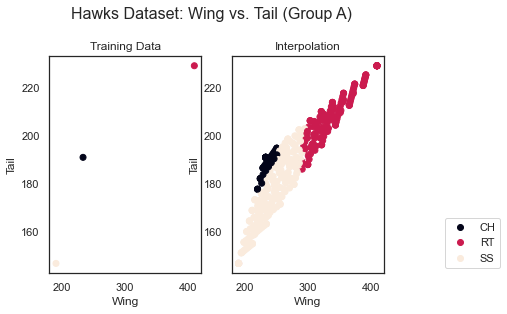

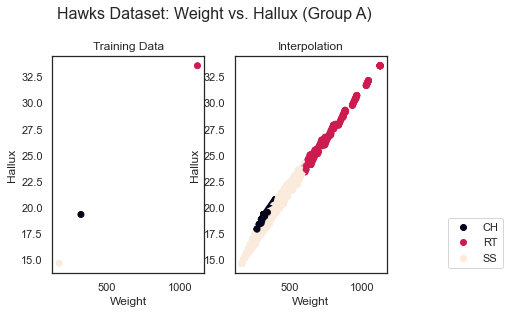

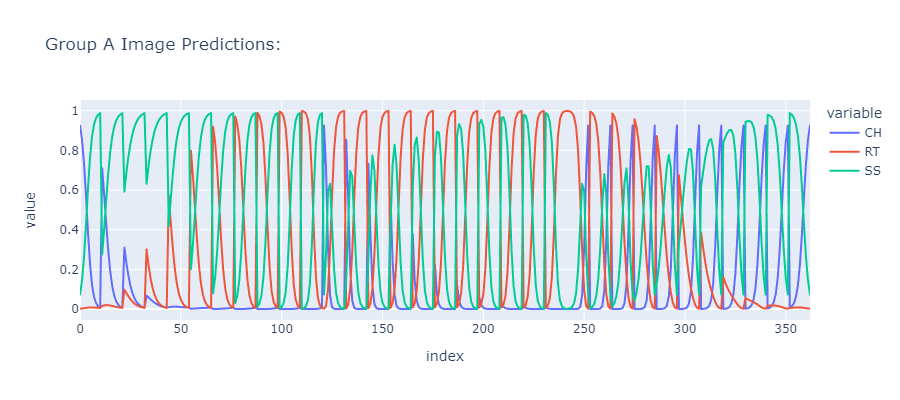

In [87]:
classes = hawk_targets

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.suptitle('Hawks Dataset: Wing vs. Tail (Group A)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_hawks_new_A['Wing'], 
            df_hawks_new_A['Tail'],
            c = df_hawks_new_A['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_A_123['Wing'], 
            df_hawks_A_123['Tail'],
            c = df_hawks_A_123['Predictions'])

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_wingtail_group_a.png")

plt.show()



fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Hawks Dataset: Weight vs. Hallux (Group A)',
             fontsize=16, y=1.05)

plt.xlabel("Weight")
plt.ylabel("Hallux")

scp1 = plt.scatter(df_hawks_new_A['Weight'],
                   df_hawks_new_A['Hallux'], 
                   c = df_hawks_new_A['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_A_123['Weight'], 
            df_hawks_A_123['Hallux'],
            c = df_hawks_A_123['Predictions'])

plt.xlabel("Weight")
plt.ylabel("Hallux")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_weighthallux_group_a.png")

plt.show()





fig_A_hawks = px.line(df_hawks_A_pred.iloc[:, 0:3], title="Group A Image Predictions: ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_A_hawks.update_layout(autosize=False, width=900, height=400)

fig_A_hawks.write_image("Iris Predictions 12_16_2022\\fig_A_hawks.png")

fig_A_r_hawks = Image.open("Iris Predictions 12_16_2022\\fig_A_hawks.png")

fig_A_r_hawks

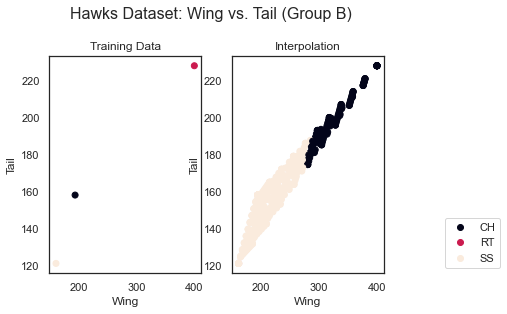

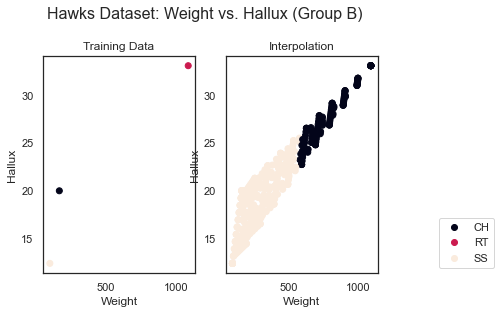

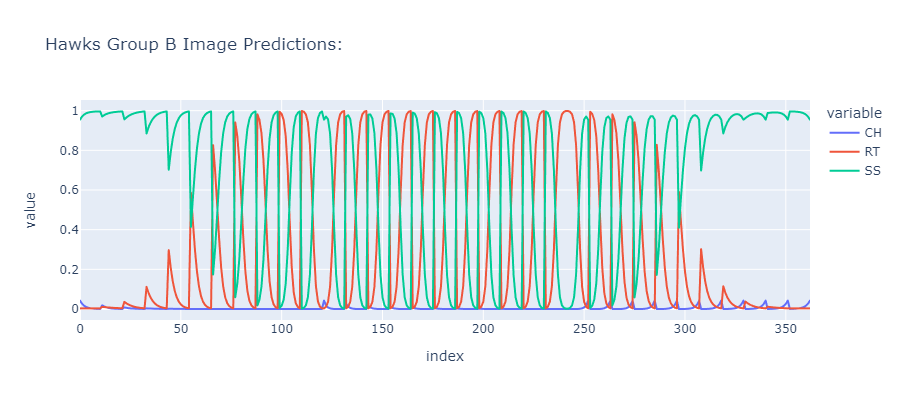

In [88]:
classes = hawk_targets

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.suptitle('Hawks Dataset: Wing vs. Tail (Group B)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_hawks_new_B['Wing'], 
            df_hawks_new_B['Tail'],
            c = df_hawks_new_B['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_B_123['Wing'], 
            df_hawks_B_123['Tail'],
            c = df_hawks_B_123['Predictions'])

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))


plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_wingtail_group_b.png")

plt.show()



fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Hawks Dataset: Weight vs. Hallux (Group B)',
             fontsize=16, y=1.05)

plt.xlabel("Weight")
plt.ylabel("Hallux")

scp1 = plt.scatter(df_hawks_new_B['Weight'],
                   df_hawks_new_B['Hallux'], 
                   c = df_hawks_new_B['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_B_123['Weight'], 
            df_hawks_B_123['Hallux'],
            c = df_hawks_B_123['Predictions'])

plt.xlabel("Weight")
plt.ylabel("Hallux")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_weighthallux_group_b.png")

plt.show()


fig_B_hawks = px.line(df_hawks_B_pred.iloc[:, 0:3], title="Hawks Group B Image Predictions: ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_B_hawks.update_layout(autosize=False, width=900, height=400)

fig_B_hawks.write_image("Iris Predictions 12_16_2022\\fig_B_hawks.png")

fig_B_r_hawks = Image.open("Iris Predictions 12_16_2022\\fig_B_hawks.png")

fig_B_r_hawks

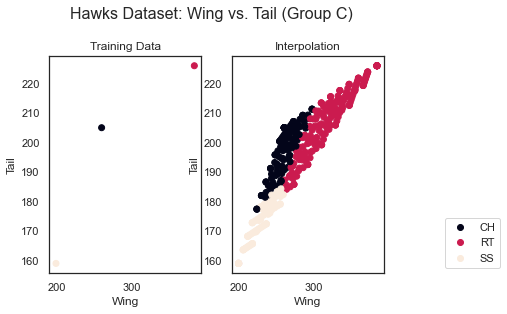

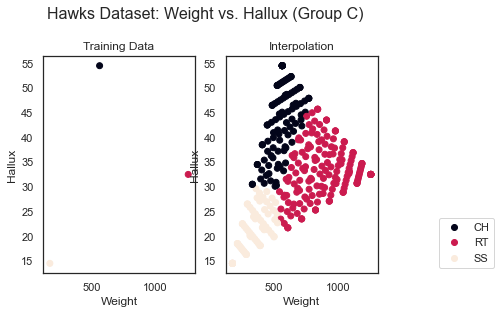

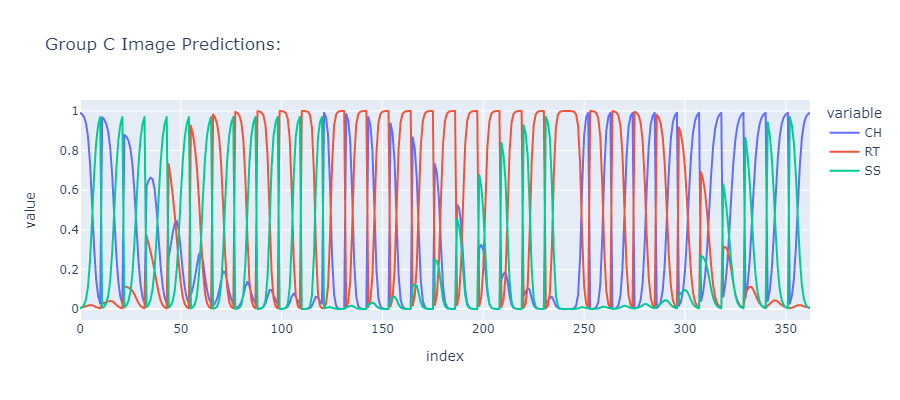

In [89]:
classes = hawk_targets

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.suptitle('Hawks Dataset: Wing vs. Tail (Group C)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_hawks_new_C['Wing'], 
            df_hawks_new_C['Tail'],
            c = df_hawks_new_C['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_C_123['Wing'], 
            df_hawks_C_123['Tail'],
            c = df_hawks_C_123['Predictions'])

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_wingtail_group_c.png")

plt.show()


fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Hawks Dataset: Weight vs. Hallux (Group C)',
             fontsize=16, y=1.05)

plt.xlabel("Weight")
plt.ylabel("Hallux")

scp1 = plt.scatter(df_hawks_new_C['Weight'],
                   df_hawks_new_C['Hallux'], 
                   c = df_hawks_new_C['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_C_123['Weight'], 
            df_hawks_C_123['Hallux'],
            c = df_hawks_C_123['Predictions'])

plt.xlabel("Weight")
plt.ylabel("Hallux")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_weighthallux_group_c.png")

plt.show()



fig_C_hawks = px.line(df_hawks_C_pred.iloc[:, 0:3], title="Group C Image Predictions: ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_C_hawks.update_layout(autosize=False, width=900, height=400)

fig_C_hawks.write_image("Iris Predictions 12_16_2022\\fig_C_hawks.png")

fig_C_r_hawks = Image.open("Iris Predictions 12_16_2022\\fig_C_hawks.png")

fig_C_r_hawks

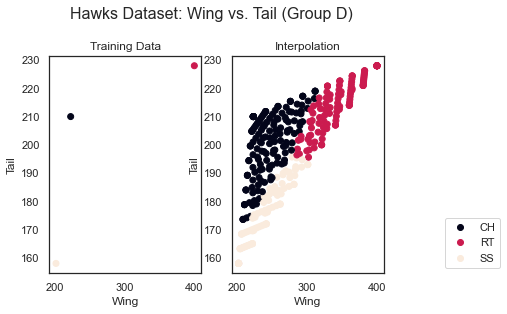

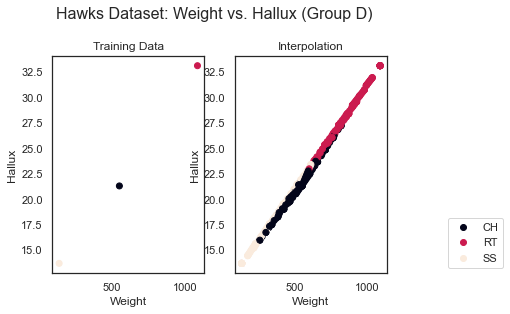

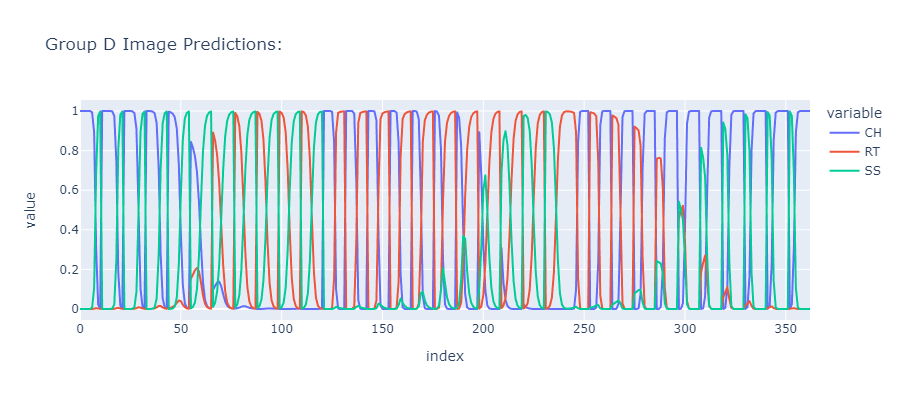

In [90]:
classes = hawk_targets

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.suptitle('Hawks Dataset: Wing vs. Tail (Group D)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_hawks_new_D['Wing'], 
            df_hawks_new_D['Tail'],
            c = df_hawks_new_D['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_D_123['Wing'], 
            df_hawks_D_123['Tail'],
            c = df_hawks_D_123['Predictions'])

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_wingtail_group_d.png")

plt.show()


fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Hawks Dataset: Weight vs. Hallux (Group D)',
             fontsize=16, y=1.05)

plt.xlabel("Weight")
plt.ylabel("Hallux")

scp1 = plt.scatter(df_hawks_new_D['Weight'],
                   df_hawks_new_D['Hallux'], 
                   c = df_hawks_new_D['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_D_123['Weight'], 
            df_hawks_D_123['Hallux'],
            c = df_hawks_D_123['Predictions'])

plt.xlabel("Weight")
plt.ylabel("Hallux")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))


plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_weighthallux_group_d.png")

plt.show()

fig_D_hawks = px.line(df_hawks_D_pred.iloc[:, 0:3], title="Group D Image Predictions: ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_D_hawks.update_layout(autosize=False, width=900, height=400)

fig_D_hawks.write_image("Iris Predictions 12_16_2022\\fig_D_hawks.png")

fig_D_r_hawks = Image.open("Iris Predictions 12_16_2022\\fig_D_hawks.png")

fig_D_r_hawks

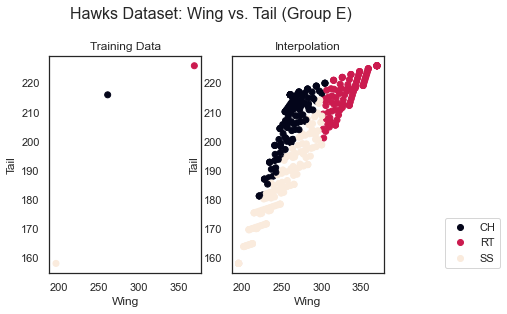

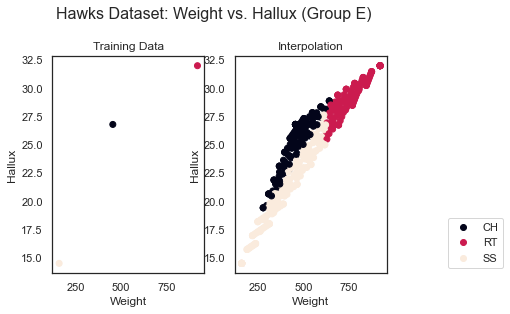

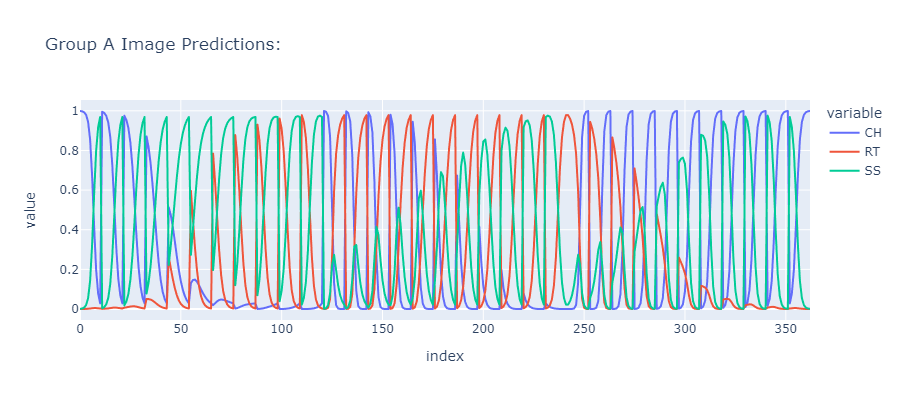

In [91]:
classes = hawk_targets

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.suptitle('Hawks Dataset: Wing vs. Tail (Group E)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_hawks_new_E['Wing'], 
            df_hawks_new_E['Tail'],
            c = df_hawks_new_E['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_E_123['Wing'], 
            df_hawks_E_123['Tail'],
            c = df_hawks_E_123['Predictions'])

plt.xlabel("Wing")
plt.ylabel("Tail")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_wingtail_group_e.png")

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Hawks Dataset: Weight vs. Hallux (Group E)',
             fontsize=16, y=1.05)

plt.xlabel("Weight")
plt.ylabel("Hallux")

scp1 = plt.scatter(df_hawks_new_E['Weight'],
                   df_hawks_new_E['Hallux'], 
                   c = df_hawks_new_E['Species Type'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_hawks_E_123['Weight'], 
            df_hawks_E_123['Hallux'],
            c = df_hawks_E_123['Predictions'])

plt.xlabel("Weight")
plt.ylabel("Hallux")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_hawks_weighthallux_group_e.png")

plt.show()



fig_E_hawks = px.line(df_hawks_E_pred.iloc[:, 0:3], title="Group A Image Predictions: ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_E_hawks.update_layout(autosize=False, width=900, height=400)

fig_E_hawks.write_image("Iris Predictions 12_16_2022\\fig_E_hawks.png")

fig_E_r_hawks = Image.open("Iris Predictions 12_16_2022\\fig_E_hawks.png")

fig_E_r_hawks

In [ ]:
fig_A_hawks_pred = px.scatter_ternary(df_hawks_A_pred, a="RT", b="CH", c="SS", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"RT": "blue", "CH": "green", "SS":"red"} )

fig_A_hawks_pred.write_image("Iris Predictions 12_16_2022\\fig_A_hawks_ternary.png")

fig_A_hawks_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_A_hawks_ternary.png")

fig_A_hawks_pred_r

In [ ]:
fig_B_hawks_pred = px.scatter_ternary(df_hawks_B_pred, a="RT", b="CH", c="SS", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"RT": "blue", "CH": "green", "SS":"red"} )

fig_B_hawks_pred.write_image("Iris Predictions 12_16_2022\\fig_B_hawks_ternary.png")

fig_B_hawks_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_B_hawks_ternary.png")

fig_B_hawks_pred_r

In [ ]:
fig_C_hawks_pred = px.scatter_ternary(df_hawks_C_pred, a="RT", b="CH", c="SS", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"RT": "blue", "CH": "green", "SS":"red"} )

fig_C_hawks_pred.write_image("Iris Predictions 12_16_2022\\fig_C_hawks_ternary.png")

fig_C_hawks_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_C_hawks_ternary.png")

fig_C_hawks_pred_r

In [ ]:
fig_D_hawks_pred = px.scatter_ternary(df_hawks_D_pred, a="RT", b="CH", c="SS", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"RT": "blue", "CH": "green", "SS":"red"} )

fig_D_hawks_pred.write_image("Iris Predictions 12_16_2022\\fig_D_hawks_ternary.png")

fig_D_hawks_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_D_hawks_ternary.png")

fig_D_hawks_pred_r

In [ ]:
fig_E_hawks_pred = px.scatter_ternary(df_hawks_E_pred, a="RT", b="CH", c="SS", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"RT": "blue", "CH": "green", "SS":"red"} )

fig_E_hawks_pred.write_image("Iris Predictions 12_16_2022\\fig_E_hawks_ternary.png")

fig_E_hawks_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_E_hawks_ternary.png")

fig_E_hawks_pred_r

## Seeds Dataset

In [114]:
seeds_data = pd.read_csv("seeds_dataset.txt", sep="\t", header=None, 
                       names=['Area', 'Perimeter', 'Compactness', 'Kernel Length', 'Kernel Width',
                             'Asymmetry Coefficient', 'Kernel Groove Length', 'Class'])
  
# display DataFrame
seeds_data.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [115]:
occur = seeds_data.groupby(['Class']).size()
 
# display occurrences of a particular column
display(occur)

Class
1    70
2    70
3    70
dtype: int64

In [116]:
seeds_data['Seed Type'] = seeds_data['Class'].map({1:'Kama',2:'Canadian', 3:'Rosa'})

In [117]:
seeds_data

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class,Seed Type
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1,Kama
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1,Kama
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1,Kama
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1,Kama
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1,Kama
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1,Kama


In [118]:
seeds_df = seeds_data.groupby(['Class']).sample(50)

In [119]:
seeds_df = seeds_df.drop(['Area', 'Perimeter', 'Compactness'], axis=1)

In [120]:
seeds_df

,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class,Seed Type
1,5.554,3.333,1.0180,4.956,1,Kama
35,5.709,3.485,2.2700,5.443,1,Kama
69,5.412,2.882,3.5330,5.067,1,Kama
5,5.386,3.312,2.4620,4.956,1,Kama
59,5.159,3.032,1.5020,4.519,1,Kama
29,5.516,3.065,3.5310,5.097,1,Kama
19,5.226,3.049,4.1020,4.914,1,Kama
21,5.520,3.168,2.6880,5.219,1,Kama
7,5.420,3.302,2.7000,5.000,1,Kama
15,5.351,3.333,4.1850,4.781,1,Kama


In [121]:
seeds_df.sort_values(by = 'Class', inplace = True)
seeds_df.reset_index(drop=True, inplace=True)

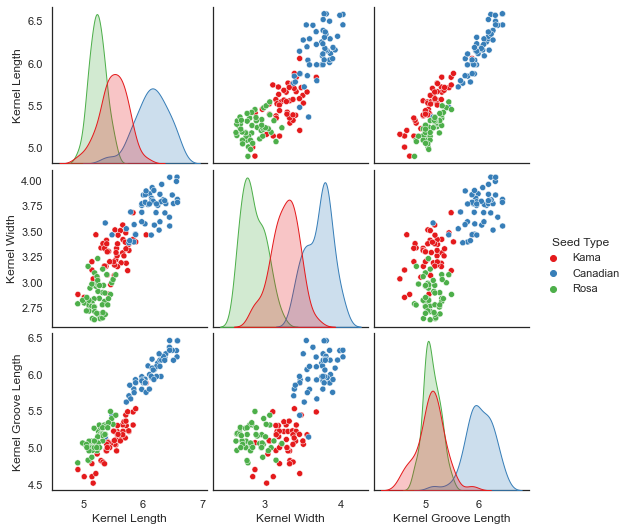

In [122]:
group_seeds = sns.pairplot(seeds_df[['Kernel Length', 'Kernel Width', 'Kernel Groove Length', 'Seed Type']],
             hue="Seed Type", diag_kind="kde", palette="Set1")

In [123]:
seeds_df

,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class,Seed Type
0,5.554,3.333,1.0180,4.956,1,Kama
1,5.832,3.683,2.9560,5.484,1,Kama
2,5.717,3.186,3.9200,5.299,1,Kama
3,5.291,3.337,2.6990,4.825,1,Kama
4,5.395,3.070,4.1570,5.088,1,Kama
5,5.541,3.221,2.7540,5.038,1,Kama
6,5.833,3.421,0.9030,5.307,1,Kama
7,5.656,3.288,3.1120,5.309,1,Kama
8,5.563,3.259,3.5860,5.219,1,Kama
9,5.763,3.312,2.2210,5.220,1,Kama


In [124]:
seed_targets = list((seeds_df['Seed Type']).unique())

In [125]:
seeds_df[seeds_df.columns[:-1]].values

array([[5.554 , 3.333 , 1.018 , 4.956 , 1.    ],
       [5.832 , 3.683 , 2.956 , 5.484 , 1.    ],
       [5.717 , 3.186 , 3.92  , 5.299 , 1.    ],
       [5.291 , 3.337 , 2.699 , 4.825 , 1.    ],
       [5.395 , 3.07  , 4.157 , 5.088 , 1.    ],
       [5.541 , 3.221 , 2.754 , 5.038 , 1.    ],
       [5.833 , 3.421 , 0.903 , 5.307 , 1.    ],
       [5.656 , 3.288 , 3.112 , 5.309 , 1.    ],
       [5.563 , 3.259 , 3.586 , 5.219 , 1.    ],
       [5.763 , 3.312 , 2.221 , 5.22  , 1.    ],
       [5.527 , 3.514 , 1.599 , 5.046 , 1.    ],
       [5.376 , 3.155 , 1.56  , 4.961 , 1.    ],
       [5.348 , 3.156 , 2.587 , 5.178 , 1.    ],
       [5.877 , 3.396 , 4.711 , 5.528 , 1.    ],
       [4.902 , 2.879 , 2.269 , 4.703 , 1.    ],
       [5.757 , 3.371 , 3.412 , 5.228 , 1.    ],
       [5.63  , 3.19  , 1.313 , 5.15  , 1.    ],
       [5.678 , 3.258 , 2.129 , 5.351 , 1.    ],
       [5.545 , 3.291 , 2.704 , 5.111 , 1.    ],
       [5.384 , 3.412 , 1.142 , 5.088 , 1.    ],
       [5.662 , 3.41

In [126]:
seeds_df['Class'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [127]:
seeds_df

,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class,Seed Type
0,5.554,3.333,1.0180,4.956,1,Kama
1,5.832,3.683,2.9560,5.484,1,Kama
2,5.717,3.186,3.9200,5.299,1,Kama
3,5.291,3.337,2.6990,4.825,1,Kama
4,5.395,3.070,4.1570,5.088,1,Kama
5,5.541,3.221,2.7540,5.038,1,Kama
6,5.833,3.421,0.9030,5.307,1,Kama
7,5.656,3.288,3.1120,5.309,1,Kama
8,5.563,3.259,3.5860,5.219,1,Kama
9,5.763,3.312,2.2210,5.220,1,Kama


In [128]:
# store feature matrix in "x"
X = seeds_df[seeds_df.columns[:-2]].values

# store feature vector in "y"
y = seeds_df['Class'].values



from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

# Use One-Hot-Encoding, Needed for Neural Network
Y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

for step in tf.range(100):
    model_4 = tf.keras.Sequential([
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
      ])

    model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    model_4.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0)
    loss, accuracy = model_4.evaluate(X_test, y_test, verbose=0)
    print(accuracy)
    
    
    if accuracy > 0.69:
        break
        

0.5666666626930237
0.5666666626930237
0.6666666865348816
0.5333333611488342
0.5666666626930237
0.5666666626930237
0.5666666626930237
0.46666666865348816
0.4000000059604645
0.5333333611488342
0.4333333373069763
0.6666666865348816
0.5
0.5333333611488342
0.6000000238418579
0.5333333611488342
0.20000000298023224
0.6000000238418579
0.5666666626930237
0.5333333611488342
0.5333333611488342
0.5666666626930237
0.6000000238418579
0.4333333373069763
0.5666666626930237
0.46666666865348816
0.6333333253860474
0.46666666865348816
0.6000000238418579
0.7333333492279053


In [129]:
def interpolate_points3(dataframe, model):
    
    # 1 / 2 > 3
    sl1 = dataframe[dataframe.columns[0]].iloc[0]
    sl2 = dataframe[dataframe.columns[0]].iloc[1]
    sl3 = dataframe[dataframe.columns[0]].iloc[2]

    sw1 = dataframe[dataframe.columns[1]].iloc[0]
    sw2 = dataframe[dataframe.columns[1]].iloc[1]
    sw3 = dataframe[dataframe.columns[1]].iloc[2]

    pl1 = dataframe[dataframe.columns[2]].iloc[0]
    pl2 = dataframe[dataframe.columns[2]].iloc[1]
    pl3 = dataframe[dataframe.columns[2]].iloc[2]

    pw1 = dataframe[dataframe.columns[3]].iloc[0]
    pw2 = dataframe[dataframe.columns[3]].iloc[1]
    pw3 = dataframe[dataframe.columns[3]].iloc[2]
    
    sl12 = np.linspace(sl1, sl2, 11)
    sl13 = np.linspace(sl1, sl3, 11)
    sl23 = np.linspace(sl2, sl3, 11)

    sw12 = np.linspace(sw1, sw2, 11)
    sw13 = np.linspace(sw1, sw3, 11)
    sw23 = np.linspace(sw2, sw3, 11)

    pl12 = np.linspace(pl1, pl2, 11)
    pl13 = np.linspace(pl1, pl3, 11)
    pl23 = np.linspace(pl2, pl3, 11)

    pw12 = np.linspace(pw1, pw2, 11)
    pw13 = np.linspace(pw1, pw3, 11)
    pw23 = np.linspace(pw2, pw3, 11)

    df_iris_12 = pd.DataFrame(list(zip(sl12, sw12, pl12, pw12)), columns = list(dataframe.columns[:-1]))
    df_iris_13 = pd.DataFrame(list(zip(sl13, sw13, pl13, pw13)), columns = list(dataframe.columns[:-1]))
    df_iris_23 = pd.DataFrame(list(zip(sl23, sw23, pl23, pw23)), columns = list(dataframe.columns[:-1]))
    
    sl_100_0 = df_iris_12[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_12[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_12[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_12[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_12[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_12[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_12[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_12[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_12[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_12[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_12[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_12[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_12[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_12[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_12[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_12[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_12[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_12[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_12[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_12[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_12[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_12[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_12[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_12[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_12[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_12[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_12[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_12[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_12[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_12[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_12[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_12[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_12[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_12[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_12[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_12[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_12[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_12[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_12[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_12[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_12[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_12[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_12[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_12[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl3, 11)
    sl_90_10 = np.linspace(sl_90_10, sl3, 11)
    sl_80_20 = np.linspace(sl_80_20, sl3, 11)
    sl_70_30 = np.linspace(sl_70_30, sl3, 11)
    sl_60_40 = np.linspace(sl_60_40, sl3, 11)
    sl_50_50 = np.linspace(sl_50_50, sl3, 11)
    sl_40_60 = np.linspace(sl_40_60, sl3, 11)
    sl_30_70 = np.linspace(sl_30_70, sl3, 11)
    sl_20_80 = np.linspace(sl_20_80, sl3, 11)
    sl_10_90 = np.linspace(sl_10_90, sl3, 11)
    sl_0_100 = np.linspace(sl_0_100, sl3, 11)

    sw_100_0 = np.linspace(sw_100_0, sw3, 11)
    sw_90_10 = np.linspace(sw_90_10, sw3, 11)
    sw_80_20 = np.linspace(sw_80_20, sw3, 11)
    sw_70_30 = np.linspace(sw_70_30, sw3, 11)
    sw_60_40 = np.linspace(sw_60_40, sw3, 11)
    sw_50_50 = np.linspace(sw_50_50, sw3, 11)
    sw_40_60 = np.linspace(sw_40_60, sw3, 11)
    sw_30_70 = np.linspace(sw_30_70, sw3, 11)
    sw_20_80 = np.linspace(sw_20_80, sw3, 11)
    sw_10_90 = np.linspace(sw_10_90, sw3, 11)
    sw_0_100 = np.linspace(sw_0_100, sw3, 11)

    pl_100_0 = np.linspace(pl_100_0, pl3, 11)
    pl_90_10 = np.linspace(pl_90_10, pl3, 11)
    pl_80_20 = np.linspace(pl_80_20, pl3, 11)
    pl_70_30 = np.linspace(pl_70_30, pl3, 11)
    pl_60_40 = np.linspace(pl_60_40, pl3, 11)
    pl_50_50 = np.linspace(pl_50_50, pl3, 11)
    pl_40_60 = np.linspace(pl_40_60, pl3, 11)
    pl_30_70 = np.linspace(pl_30_70, pl3, 11)
    pl_20_80 = np.linspace(pl_20_80, pl3, 11)
    pl_10_90 = np.linspace(pl_10_90, pl3, 11)
    pl_0_100 = np.linspace(pl_0_100, pl3, 11)

    pw_100_0 = np.linspace(pw_100_0, pw3, 11)
    pw_90_10 = np.linspace(pw_90_10, pw3, 11)
    pw_80_20 = np.linspace(pw_80_20, pw3, 11)
    pw_70_30 = np.linspace(pw_70_30, pw3, 11)
    pw_60_40 = np.linspace(pw_60_40, pw3, 11)
    pw_50_50 = np.linspace(pw_50_50, pw3, 11)
    pw_40_60 = np.linspace(pw_40_60, pw3, 11)
    pw_30_70 = np.linspace(pw_30_70, pw3, 11)
    pw_20_80 = np.linspace(pw_20_80, pw3, 11)
    pw_10_90 = np.linspace(pw_10_90, pw3, 11)
    pw_0_100 = np.linspace(pw_0_100, pw3, 11)

    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_12_3 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    # 1 / 3 > 2
    sl_100_0 = df_iris_13[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_13[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_13[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_13[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_13[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_13[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_13[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_13[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_13[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_13[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_13[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_13[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_13[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_13[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_13[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_13[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_13[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_13[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_13[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_13[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_13[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_13[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_13[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_13[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_13[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_13[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_13[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_13[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_13[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_13[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_13[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_13[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_13[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_13[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_13[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_13[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_13[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_13[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_13[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_13[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_13[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_13[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_13[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_13[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl2, 11)
    sl_90_10 = np.linspace(sl_90_10, sl2, 11)
    sl_80_20 = np.linspace(sl_80_20, sl2, 11)
    sl_70_30 = np.linspace(sl_70_30, sl2, 11)
    sl_60_40 = np.linspace(sl_60_40, sl2, 11)
    sl_50_50 = np.linspace(sl_50_50, sl2, 11)
    sl_40_60 = np.linspace(sl_40_60, sl2, 11)
    sl_30_70 = np.linspace(sl_30_70, sl2, 11)
    sl_20_80 = np.linspace(sl_20_80, sl2, 11)
    sl_10_90 = np.linspace(sl_10_90, sl2, 11)
    sl_0_100 = np.linspace(sl_0_100, sl2, 11)

    sw_100_0 = np.linspace(sw_100_0, sw2, 11)
    sw_90_10 = np.linspace(sw_90_10, sw2, 11)
    sw_80_20 = np.linspace(sw_80_20, sw2, 11)
    sw_70_30 = np.linspace(sw_70_30, sw2, 11)
    sw_60_40 = np.linspace(sw_60_40, sw2, 11)
    sw_50_50 = np.linspace(sw_50_50, sw2, 11)
    sw_40_60 = np.linspace(sw_40_60, sw2, 11)
    sw_30_70 = np.linspace(sw_30_70, sw2, 11)
    sw_20_80 = np.linspace(sw_20_80, sw2, 11)
    sw_10_90 = np.linspace(sw_10_90, sw2, 11)
    sw_0_100 = np.linspace(sw_0_100, sw2, 11)

    pl_100_0 = np.linspace(pl_100_0, pl2, 11)
    pl_90_10 = np.linspace(pl_90_10, pl2, 11)
    pl_80_20 = np.linspace(pl_80_20, pl2, 11)
    pl_70_30 = np.linspace(pl_70_30, pl2, 11)
    pl_60_40 = np.linspace(pl_60_40, pl2, 11)
    pl_50_50 = np.linspace(pl_50_50, pl2, 11)
    pl_40_60 = np.linspace(pl_40_60, pl2, 11)
    pl_30_70 = np.linspace(pl_30_70, pl2, 11)
    pl_20_80 = np.linspace(pl_20_80, pl2, 11)
    pl_10_90 = np.linspace(pl_10_90, pl2, 11)
    pl_0_100 = np.linspace(pl_0_100, pl2, 11)

    pw_100_0 = np.linspace(pw_100_0, pw2, 11)
    pw_90_10 = np.linspace(pw_90_10, pw2, 11)
    pw_80_20 = np.linspace(pw_80_20, pw2, 11)
    pw_70_30 = np.linspace(pw_70_30, pw2, 11)
    pw_60_40 = np.linspace(pw_60_40, pw2, 11)
    pw_50_50 = np.linspace(pw_50_50, pw2, 11)
    pw_40_60 = np.linspace(pw_40_60, pw2, 11)
    pw_30_70 = np.linspace(pw_30_70, pw2, 11)
    pw_20_80 = np.linspace(pw_20_80, pw2, 11)
    pw_10_90 = np.linspace(pw_10_90, pw2, 11)
    pw_0_100 = np.linspace(pw_0_100, pw2, 11)

    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_13_2 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    # 2 / 3 > 1
    sl_100_0 = df_iris_23[dataframe.columns[0]].iloc[0]
    sl_90_10 = df_iris_23[dataframe.columns[0]].iloc[1]
    sl_80_20 = df_iris_23[dataframe.columns[0]].iloc[2]
    sl_70_30 = df_iris_23[dataframe.columns[0]].iloc[3]
    sl_60_40 = df_iris_23[dataframe.columns[0]].iloc[4]
    sl_50_50 = df_iris_23[dataframe.columns[0]].iloc[5]
    sl_40_60 = df_iris_23[dataframe.columns[0]].iloc[6]
    sl_30_70 = df_iris_23[dataframe.columns[0]].iloc[7]
    sl_20_80 = df_iris_23[dataframe.columns[0]].iloc[8]
    sl_10_90 = df_iris_23[dataframe.columns[0]].iloc[9]
    sl_0_100 = df_iris_23[dataframe.columns[0]].iloc[10]

    sw_100_0 = df_iris_23[dataframe.columns[1]].iloc[0]
    sw_90_10 = df_iris_23[dataframe.columns[1]].iloc[1]
    sw_80_20 = df_iris_23[dataframe.columns[1]].iloc[2]
    sw_70_30 = df_iris_23[dataframe.columns[1]].iloc[3]
    sw_60_40 = df_iris_23[dataframe.columns[1]].iloc[4]
    sw_50_50 = df_iris_23[dataframe.columns[1]].iloc[5]
    sw_40_60 = df_iris_23[dataframe.columns[1]].iloc[6]
    sw_30_70 = df_iris_23[dataframe.columns[1]].iloc[7]
    sw_20_80 = df_iris_23[dataframe.columns[1]].iloc[8]
    sw_10_90 = df_iris_23[dataframe.columns[1]].iloc[9]
    sw_0_100 = df_iris_23[dataframe.columns[1]].iloc[10]

    pl_100_0 = df_iris_23[dataframe.columns[2]].iloc[0]
    pl_90_10 = df_iris_23[dataframe.columns[2]].iloc[1]
    pl_80_20 = df_iris_23[dataframe.columns[2]].iloc[2]
    pl_70_30 = df_iris_23[dataframe.columns[2]].iloc[3]
    pl_60_40 = df_iris_23[dataframe.columns[2]].iloc[4]
    pl_50_50 = df_iris_23[dataframe.columns[2]].iloc[5]
    pl_40_60 = df_iris_23[dataframe.columns[2]].iloc[6]
    pl_30_70 = df_iris_23[dataframe.columns[2]].iloc[7]
    pl_20_80 = df_iris_23[dataframe.columns[2]].iloc[8]
    pl_10_90 = df_iris_23[dataframe.columns[2]].iloc[9]
    pl_0_100 = df_iris_23[dataframe.columns[2]].iloc[10]

    pw_100_0 = df_iris_23[dataframe.columns[3]].iloc[0]
    pw_90_10 = df_iris_23[dataframe.columns[3]].iloc[1]
    pw_80_20 = df_iris_23[dataframe.columns[3]].iloc[2]
    pw_70_30 = df_iris_23[dataframe.columns[3]].iloc[3]
    pw_60_40 = df_iris_23[dataframe.columns[3]].iloc[4]
    pw_50_50 = df_iris_23[dataframe.columns[3]].iloc[5]
    pw_40_60 = df_iris_23[dataframe.columns[3]].iloc[6]
    pw_30_70 = df_iris_23[dataframe.columns[3]].iloc[7]
    pw_20_80 = df_iris_23[dataframe.columns[3]].iloc[8]
    pw_10_90 = df_iris_23[dataframe.columns[3]].iloc[9]
    pw_0_100 = df_iris_23[dataframe.columns[3]].iloc[10]
    
    sl_100_0 = np.linspace(sl_100_0, sl1, 11)
    sl_90_10 = np.linspace(sl_90_10, sl1, 11)
    sl_80_20 = np.linspace(sl_80_20, sl1, 11)
    sl_70_30 = np.linspace(sl_70_30, sl1, 11)
    sl_60_40 = np.linspace(sl_60_40, sl1, 11)
    sl_50_50 = np.linspace(sl_50_50, sl1, 11)
    sl_40_60 = np.linspace(sl_40_60, sl1, 11)
    sl_30_70 = np.linspace(sl_30_70, sl1, 11)
    sl_20_80 = np.linspace(sl_20_80, sl1, 11)
    sl_10_90 = np.linspace(sl_10_90, sl1, 11)
    sl_0_100 = np.linspace(sl_0_100, sl1, 11)

    sw_100_0 = np.linspace(sw_100_0, sw1, 11)
    sw_90_10 = np.linspace(sw_90_10, sw1, 11)
    sw_80_20 = np.linspace(sw_80_20, sw1, 11)
    sw_70_30 = np.linspace(sw_70_30, sw1, 11)
    sw_60_40 = np.linspace(sw_60_40, sw1, 11)
    sw_50_50 = np.linspace(sw_50_50, sw1, 11)
    sw_40_60 = np.linspace(sw_40_60, sw1, 11)
    sw_30_70 = np.linspace(sw_30_70, sw1, 11)
    sw_20_80 = np.linspace(sw_20_80, sw1, 11)
    sw_10_90 = np.linspace(sw_10_90, sw1, 11)
    sw_0_100 = np.linspace(sw_0_100, sw1, 11)

    pl_100_0 = np.linspace(pl_100_0, pl1, 11)
    pl_90_10 = np.linspace(pl_90_10, pl1, 11)
    pl_80_20 = np.linspace(pl_80_20, pl1, 11)
    pl_70_30 = np.linspace(pl_70_30, pl1, 11)
    pl_60_40 = np.linspace(pl_60_40, pl1, 11)
    pl_50_50 = np.linspace(pl_50_50, pl1, 11)
    pl_40_60 = np.linspace(pl_40_60, pl1, 11)
    pl_30_70 = np.linspace(pl_30_70, pl1, 11)
    pl_20_80 = np.linspace(pl_20_80, pl1, 11)
    pl_10_90 = np.linspace(pl_10_90, pl1, 11)
    pl_0_100 = np.linspace(pl_0_100, pl1, 11)

    pw_100_0 = np.linspace(pw_100_0, pw1, 11)
    pw_90_10 = np.linspace(pw_90_10, pw1, 11)
    pw_80_20 = np.linspace(pw_80_20, pw1, 11)
    pw_70_30 = np.linspace(pw_70_30, pw1, 11)
    pw_60_40 = np.linspace(pw_60_40, pw1, 11)
    pw_50_50 = np.linspace(pw_50_50, pw1, 11)
    pw_40_60 = np.linspace(pw_40_60, pw1, 11)
    pw_30_70 = np.linspace(pw_30_70, pw1, 11)
    pw_20_80 = np.linspace(pw_20_80, pw1, 11)
    pw_10_90 = np.linspace(pw_10_90, pw1, 11)
    pw_0_100 = np.linspace(pw_0_100, pw1, 11)
    
    df_iris_100_0 = pd.DataFrame(list(zip(sl_100_0, sw_100_0, pl_100_0, pw_100_0)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_90_10 = pd.DataFrame(list(zip(sl_90_10, sw_90_10, pl_90_10, pw_90_10)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_80_20 = pd.DataFrame(list(zip(sl_80_20, sw_80_20, pl_80_20, pw_80_20)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_70_30 = pd.DataFrame(list(zip(sl_70_30, sw_70_30, pl_70_30, pw_70_30)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_60_40 = pd.DataFrame(list(zip(sl_60_40, sw_60_40, pl_60_40, pw_60_40)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_50_50 = pd.DataFrame(list(zip(sl_50_50, sw_50_50, pl_50_50, pw_50_50)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_40_60 = pd.DataFrame(list(zip(sl_40_60, sw_40_60, pl_40_60, pw_40_60)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_30_70 = pd.DataFrame(list(zip(sl_30_70, sw_30_70, pl_30_70, pw_30_70)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_20_80 = pd.DataFrame(list(zip(sl_20_80, sw_20_80, pl_20_80, pw_20_80)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_10_90 = pd.DataFrame(list(zip(sl_10_90, sw_10_90, pl_10_90, pw_10_90)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_0_100 = pd.DataFrame(list(zip(sl_0_100, sw_0_100, pl_0_100, pw_0_100)), 
                                   columns = list(dataframe.columns[:-1]))

    df_iris_23_1 = df_iris_100_0.append([ 
                                  df_iris_90_10,
                                  df_iris_80_20,
                                  df_iris_70_30,
                                  df_iris_60_40,
                                  df_iris_50_50,
                                  df_iris_40_60,
                                  df_iris_30_70,
                                  df_iris_20_80,
                                  df_iris_10_90,
                                  df_iris_0_100
                                    ])
    
    df_iris_123 = df_iris_12_3.append([ 
                              df_iris_13_2,
                              df_iris_23_1
                                ])
    
    df_pred = pd.DataFrame()
    
    targets = []

    X_new = []

    for index, row in df_iris_123.iterrows():
        X_new.append([row[dataframe.columns[0]], row[dataframe.columns[1]],
             row[dataframe.columns[2]], row[dataframe.columns[3]]])

    y_pred = model.predict(X_new)

    targets = np.argmax(y_pred,axis=1)

    target_names = []
    target_counts = []

    for count, i in zip(range(len(targets)), targets):
        if i == 0:
            target_names.append(seed_targets[0])
            target_counts.append(y_pred[count][0])
        elif i == 1:
            target_names.append(seed_targets[1])
            target_counts.append(y_pred[count][1])
        elif i == 2:
            target_names.append(seed_targets[2])
            target_counts.append(y_pred[count][2])

    kama = []
    canadian = []
    rosa = []

    for i in y_pred:
        kama.append(i[0])
        canadian.append(i[1])
        rosa.append(i[2])

    df_pred['Kama'] = kama
    df_pred['Canadian'] = canadian
    df_pred['Rosa'] = rosa

    df_pred['Prediction'] = target_names
    df_pred['Counts'] = target_counts

    df_iris_123['Predictions'] = targets
    
    return df_iris_123, df_pred

In [130]:
df_iris_new_A

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
40,5.0,3.5,1.3,0.3,0
88,5.6,3.0,4.1,1.3,1
115,6.4,3.2,5.3,2.3,2


In [131]:
# df_seeds = seeds_df.copy()
# df_seeds['Target'] = seeds_df['Seed Type']

df_seeds_new_A = seeds_df.groupby(['Class']).sample(1).drop(['Seed Type'], axis=1)
df_seeds_new_B = seeds_df.groupby(['Class']).sample(1).drop(['Seed Type'], axis=1)
df_seeds_new_C = seeds_df.groupby(['Class']).sample(1).drop(['Seed Type'], axis=1)
df_seeds_new_D = seeds_df.groupby(['Class']).sample(1).drop(['Seed Type'], axis=1)
df_seeds_new_E = seeds_df.groupby(['Class']).sample(1).drop(['Seed Type'], axis=1)

In [132]:
df_seeds_new_A

,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
3,5.291,3.337,2.699,4.825,1
80,6.493,3.857,3.063,6.320,2
143,5.236,3.017,4.987,5.147,3


In [133]:
df_seeds_A_123, df_seeds_A_pred = interpolate_points3(df_seeds_new_A, model_4)

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:169: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:312: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:455: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:468: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [134]:
df_seeds_B_123, df_seeds_B_pred = interpolate_points3(df_seeds_new_B, model_4)

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:169: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:312: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:455: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:468: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [135]:
df_seeds_C_123, df_seeds_C_pred = interpolate_points3(df_seeds_new_C, model_4)

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:169: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:312: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:455: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:468: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [136]:
df_seeds_D_123, df_seeds_D_pred = interpolate_points3(df_seeds_new_D, model_4)

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:169: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:312: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:455: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:468: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [137]:
df_seeds_E_123, df_seeds_E_pred = interpolate_points3(df_seeds_new_E, model_4)

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:169: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:312: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:455: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\WTP\AppData\Local\Temp\ipykernel_19928\2732988610.py:468: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [138]:
df_seeds_A_123

,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Predictions
0,5.29100,3.3370,2.69900,4.82500,0
1,5.28550,3.3050,2.92780,4.85720,1
2,5.28000,3.2730,3.15660,4.88940,1
3,5.27450,3.2410,3.38540,4.92160,1
4,5.26900,3.2090,3.61420,4.95380,1
5,5.26350,3.1770,3.84300,4.98600,1
6,5.25800,3.1450,4.07180,5.01820,1
7,5.25250,3.1130,4.30060,5.05040,2
8,5.24700,3.0810,4.52940,5.08260,2
9,5.24150,3.0490,4.75820,5.11480,2


In [139]:
df_seeds_A_pred

,Kama,Canadian,Rosa,Prediction,Counts
0,0.444094,0.425096,0.130810,Kama,0.444094
1,0.420407,0.452434,0.127159,Canadian,0.452434
2,0.394122,0.475327,0.130551,Canadian,0.475327
3,0.355774,0.474288,0.169938,Canadian,0.474288
4,0.316218,0.465975,0.217807,Canadian,0.465975
5,0.276083,0.449699,0.274217,Canadian,0.449699
6,0.236253,0.425370,0.338377,Canadian,0.425370
7,0.197803,0.393666,0.408531,Rosa,0.408531
8,0.161861,0.356077,0.482062,Rosa,0.482062
9,0.129427,0.314727,0.555846,Rosa,0.555846


In [140]:
df_seeds_new_A

,Kernel Length,Kernel Width,Asymmetry Coefficient,Kernel Groove Length,Class
3,5.291,3.337,2.699,4.825,1
80,6.493,3.857,3.063,6.320,2
143,5.236,3.017,4.987,5.147,3


### Note: Need to Check X/Y Axes

In [141]:
classes = seed_targets

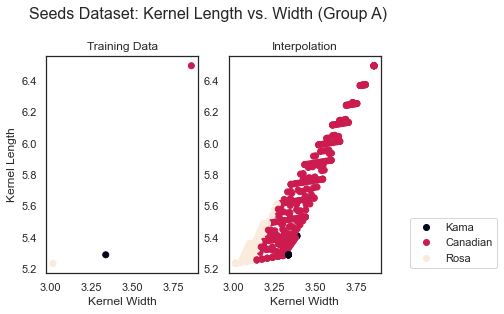

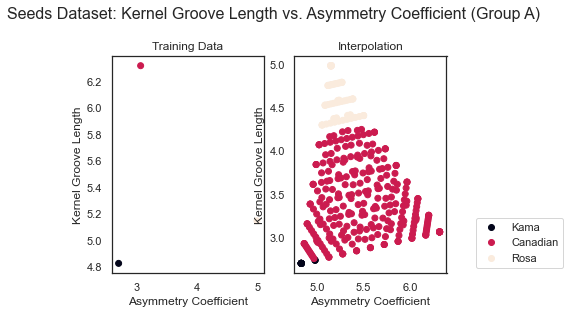

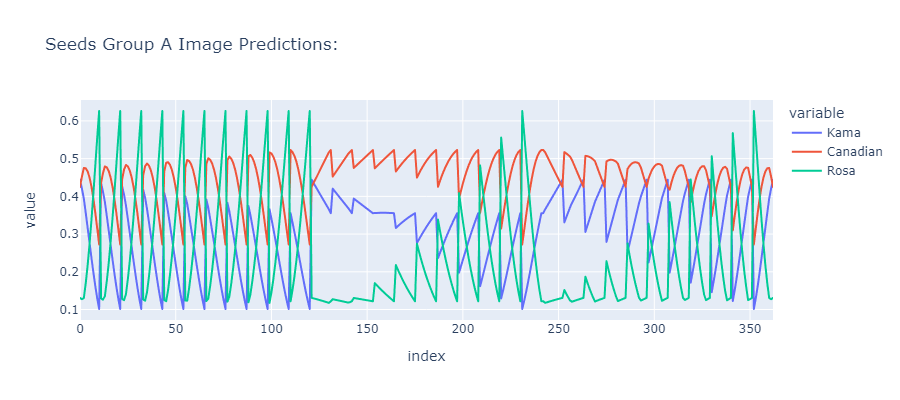

In [142]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Kernel Width")
plt.ylabel("Kernel Length")

plt.suptitle('Seeds Dataset: Kernel Length vs. Width (Group A)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_seeds_new_A['Kernel Width'], 
            df_seeds_new_A['Kernel Length'],
            c = df_seeds_new_A['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_A_123['Kernel Width'], 
            df_seeds_A_123['Kernel Length'],
            c = df_seeds_A_123['Predictions'])

plt.xlabel("Kernel Width")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))


plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_widthlength_group_a.png")

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Seeds Dataset: Kernel Groove Length vs. Asymmetry Coefficient (Group A)', 
             fontsize=16, y=1.05)

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

scp1 = plt.scatter(df_seeds_new_A['Asymmetry Coefficient'],
                   df_seeds_new_A['Kernel Groove Length'], 
                   c = df_seeds_new_A['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_A_123['Kernel Groove Length'], 
            df_seeds_A_123['Asymmetry Coefficient'],
            c = df_seeds_A_123['Predictions'])

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_coefficientgroove_group_a.png")

plt.show()


fig_A = px.line(df_seeds_A_pred.iloc[:, 0:3], title="Seeds Group A Image Predictions: ")
#               str('[ ' + g1_group[0]) + " and " + str(g1_group[1]) + " ] into " + str(g1_group[2]))

fig_A.update_layout(autosize=False, width=900, height=400)

fig_A.write_image("Iris Predictions 12_16_2022\\fig_A_seeds.png")

fig_A_r = Image.open("Iris Predictions 12_16_2022\\fig_A_seeds.png")

fig_A_r

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Kernel Width")
plt.ylabel("Kernel Length")

plt.suptitle('Seeds Dataset: Kernel Length vs. Width (Group B)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_seeds_new_B['Kernel Width'], 
            df_seeds_new_B['Kernel Length'],
            c = df_seeds_new_B['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_B_123['Kernel Width'], 
            df_seeds_B_123['Kernel Length'],
            c = df_seeds_B_123['Predictions'])

plt.xlabel("Kernel Width")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_widthlength_group_b.png")

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Seeds Dataset: Kernel Groove Length vs. Asymmetry Coefficient (Group B)', 
             fontsize=16, y=1.05)

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

scp1 = plt.scatter(df_seeds_new_B['Asymmetry Coefficient'],
                   df_seeds_new_B['Kernel Groove Length'], 
                   c = df_seeds_new_B['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_B_123['Kernel Groove Length'], 
            df_seeds_B_123['Asymmetry Coefficient'],
            c = df_seeds_B_123['Predictions'])

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_coefficientgroove_group_b.png")

plt.show()


fig_B = px.line(df_seeds_B_pred.iloc[:, 0:3], title="Seeds Group B Image Predictions: ")

fig_B.update_layout(autosize=False, width=900, height=400)

fig_B.write_image("Iris Predictions 12_16_2022\\fig_B_seeds.png")

fig_B_r = Image.open("Iris Predictions 12_16_2022\\fig_B_seeds.png")

fig_B_r

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Kernel Width")
plt.ylabel("Kernel Length")

plt.suptitle('Seeds Dataset: Kernel Length vs. Width (Group C)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_seeds_new_C['Kernel Width'], 
            df_seeds_new_C['Kernel Length'],
            c = df_seeds_new_C['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_C_123['Kernel Width'], 
            df_seeds_C_123['Kernel Length'],
            c = df_seeds_C_123['Predictions'])

plt.xlabel("Kernel Width")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))


plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_widthlength_group_c.png")

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Seeds Dataset: Kernel Groove Length vs. Asymmetry Coefficient (Group C)', 
             fontsize=16, y=1.05)

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

scp1 = plt.scatter(df_seeds_new_C['Asymmetry Coefficient'],
                   df_seeds_new_C['Kernel Groove Length'], 
                   c = df_seeds_new_C['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_C_123['Kernel Groove Length'], 
            df_seeds_C_123['Asymmetry Coefficient'],
            c = df_seeds_C_123['Predictions'])

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))


plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_coefficientgroove_group_c.png")

plt.show()

fig_C = px.line(df_seeds_C_pred.iloc[:, 0:3], title="Seeds Group C Image Predictions: ")

fig_C.update_layout(autosize=False, width=900, height=400)

fig_C.write_image("Iris Predictions 12_16_2022\\fig_C_seeds.png")

fig_C_r = Image.open("Iris Predictions 12_16_2022\\fig_C_seeds.png")

fig_C_r

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Kernel Width")
plt.ylabel("Kernel Length")

plt.suptitle('Seeds Dataset: Kernel Length vs. Width (Group D)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_seeds_new_D['Kernel Width'], 
            df_seeds_new_D['Kernel Length'],
            c = df_seeds_new_D['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_D_123['Kernel Width'], 
            df_seeds_D_123['Kernel Length'],
            c = df_seeds_D_123['Predictions'])

plt.xlabel("Kernel Width")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_widthlength_group_d.png")

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Seeds Dataset: Kernel Groove Length vs. Asymmetry Coefficient (Group D)', 
             fontsize=16, y=1.05)

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

scp1 = plt.scatter(df_seeds_new_D['Asymmetry Coefficient'],
                   df_seeds_new_D['Kernel Groove Length'], 
                   c = df_seeds_new_D['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_D_123['Kernel Groove Length'], 
            df_seeds_D_123['Asymmetry Coefficient'],
            c = df_seeds_D_123['Predictions'])

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))


plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_coefficientgroove_group_d.png")

plt.show()


fig_D = px.line(df_seeds_D_pred.iloc[:, 0:3], title="Seeds Group D Image Predictions: ")

fig_D.update_layout(autosize=False, width=900, height=400)

fig_D.write_image("Iris Predictions 12_16_2022\\fig_D_seeds.png")

fig_D_r = Image.open("Iris Predictions 12_16_2022\\fig_D_seeds.png")

fig_D_r

In [ ]:
fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.xlabel("Kernel Width")
plt.ylabel("Kernel Length")

plt.suptitle('Seeds Dataset: Kernel Length vs. Width (Group E)', fontsize=16, y=1.05)

scp1 = plt.scatter(df_seeds_new_E['Kernel Width'], 
            df_seeds_new_E['Kernel Length'],
            c = df_seeds_new_E['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_E_123['Kernel Width'], 
            df_seeds_E_123['Kernel Length'],
            c = df_seeds_E_123['Predictions'])

plt.xlabel("Kernel Width")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_widthlength_group_e.png")

plt.show()

fig6 = plt.figure(facecolor='white')

ax1 = fig6.add_subplot(121)

ax1.title.set_text('Training Data')

plt.suptitle('Seeds Dataset: Kernel Groove Length vs. Asymmetry Coefficient (Group E)', 
             fontsize=16, y=1.05)

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

scp1 = plt.scatter(df_seeds_new_E['Asymmetry Coefficient'],
                   df_seeds_new_E['Kernel Groove Length'], 
                   c = df_seeds_new_E['Class'])

ax2 = fig6.add_subplot(122)

ax2.title.set_text('Interpolation')

scp2 = plt.scatter(df_seeds_E_123['Kernel Groove Length'], 
            df_seeds_E_123['Asymmetry Coefficient'],
            c = df_seeds_E_123['Predictions'])

plt.xlabel("Asymmetry Coefficient")
plt.ylabel("Kernel Groove Length")

plt.legend(handles=scp1.legend_elements()[0], 
            labels=[i for i in classes], 
            loc='lower right',
            bbox_to_anchor=(1.8, 0))

plt.savefig("Iris Predictions 12_16_2022\\inter_seeds_coefficientgroove_group_e.png")

plt.show()


fig_E = px.line(df_seeds_E_pred.iloc[:, 0:3], title="Seeds Group E Image Predictions: ")

fig_E.update_layout(autosize=False, width=900, height=400)

fig_E.write_image("Iris Predictions 12_16_2022\\fig_E_seeds.png")

fig_E_r = Image.open("Iris Predictions 12_16_2022\\fig_E_seeds.png")

fig_E_r

In [ ]:
df_seeds_A_pred

In [ ]:
fig_A_seeds_pred = px.scatter_ternary(df_seeds_A_pred, a="Rosa", b="Canadian", c="Kama", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"Rosa": "blue", "Canadian": "green", "Kama":"red"} )

fig_A_seeds_pred.write_image("Iris Predictions 12_16_2022\\fig_A_seeds_ternary.png")

fig_A_seeds_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_A_seeds_ternary.png")

fig_A_seeds_pred_r

In [ ]:
fig_B_seeds_pred = px.scatter_ternary(df_seeds_B_pred, a="Rosa", b="Canadian", c="Kama", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"Rosa": "blue", "Canadian": "green", "Kama":"red"} )

fig_B_seeds_pred.write_image("Iris Predictions 12_16_2022\\fig_B_seeds_ternary.png")

fig_B_seeds_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_B_seeds_ternary.png")

fig_B_seeds_pred_r

In [ ]:
fig_C_seeds_pred = px.scatter_ternary(df_seeds_C_pred, a="Rosa", b="Canadian", c="Kama", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"Rosa": "blue", "Canadian": "green", "Kama":"red"} )

fig_C_seeds_pred.write_image("Iris Predictions 12_16_2022\\fig_C_seeds_ternary.png")

fig_C_seeds_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_C_seeds_ternary.png")

fig_C_seeds_pred_r

In [ ]:
fig_D_seeds_pred = px.scatter_ternary(df_seeds_D_pred, a="Rosa", b="Canadian", c="Kama", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"Rosa": "blue", "Canadian": "green", "Kama":"red"} )

fig_D_seeds_pred.write_image("Iris Predictions 12_16_2022\\fig_D_seeds_ternary.png")

fig_D_seeds_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_D_seeds_ternary.png")

fig_D_seeds_pred_r

In [ ]:
fig_E_seeds_pred = px.scatter_ternary(df_seeds_E_pred, a="Rosa", b="Canadian", c="Kama", 
# hover_name="district",
    color="Prediction", 
    size="Counts", 
    size_max=12,
    color_discrete_map = {"Rosa": "blue", "Canadian": "green", "Kama":"red"} )

fig_E_seeds_pred.write_image("Iris Predictions 12_16_2022\\fig_E_seeds_ternary.png")

fig_E_seeds_pred_r = Image.open("Iris Predictions 12_16_2022\\fig_E_seeds_ternary.png")

fig_E_seeds_pred_r